In [13]:
import glob, os, re
import maboss
import pandas as pd

In [3]:
# Map used: https://github.com/colomoto/colomoto-docker/raw/master/tutorials/CaSQ/Apoptosis_VS_SSA_AN.xml
model = maboss.gsparser.loadSBML('Apoptosis_VS_SSA_AN.sbml', cfg_filename=None, use_sbml_names=True, cmaboss=False)

In [4]:
all_node_names = (model.network.names)
print(all_node_names)

['BCL2BCLXLMCL1_complex', 'BIMBADPUMA_complex', 'CytochromeC', 'APAF1', 'Procasp9', 'AKT', 'Apoptosome_complex', 'SARSE7a', 'FADD', 'TRADD', 'TNFATNFR1_complex', 'TRADDFADD_complex', 'FASFASL_complex', 'CASP8', 'CASP3', 'CASP9', 'BID', 'MAPK14', 'SARSM', 'BAX', 'CASP7', 'Apoptosis_phenotype', 'SARS3a']


In [5]:
# Define the output nodes.
maboss.set_output(model, ['BAX','Apoptosis_phenotype'])

In [6]:
# Manually define the Input nodes, based on CellDesigner > CASQ > CytoScape (directed network)
input_nodes = ['SARSM' , 'FASFASL_complex' , 'TNFATNFR1_complex' , 'APAF1' , 'TRADD' , 'Procasp9' , 'SARSE7a' , 'SARS3a']
# the Internal nodes will be all input_nodes minus the Input nodes
internal_nodes = list(set(all_node_names) - set(input_nodes))

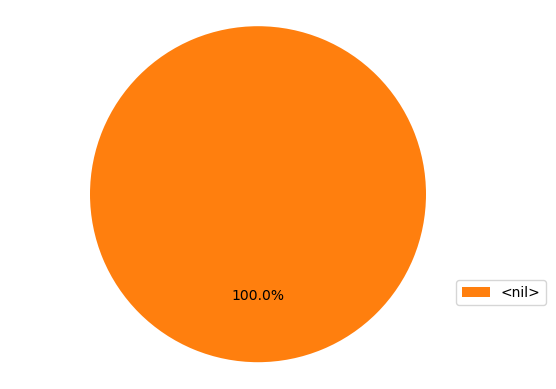

In [7]:
# Simulate the model with random condition >> Need to be confirmed.
res = model.run()
res.plot_piechart()

In [50]:
def tabulate_node_prob(model):
    """
    Extracts the initial ON/OFF probability of every node in a MaBoSS model
    and returns it as a pandas DataFrame.
    """
    # Retrieve the initial state probabilities for all nodes in the model
    node_prob = model.network.get_istate()
    # Convert the dictionary into a table:
    df = (pd.DataFrame(node_prob).T
        .rename(columns={0: "OFF", 1: "ON"})
        .reset_index()
        .rename(columns={"index": "Node"}))
    return df

                     Node  OFF_before  ON_before  OFF_after  ON_after
0   BCL2BCLXLMCL1_complex           1          0        0.5       0.5
1      BIMBADPUMA_complex           1          0        0.5       0.5
2             CytochromeC           1          0        0.5       0.5
3                   APAF1           1          0        0.5       0.5
4                Procasp9           1          0        0.5       0.5
5                     AKT           1          0        0.5       0.5
6      Apoptosome_complex           1          0        0.5       0.5
7                 SARSE7a           1          0        0.5       0.5
8                    FADD           1          0        0.5       0.5
9                   TRADD           1          0        0.5       0.5
10      TNFATNFR1_complex           1          0        0.5       0.5
11      TRADDFADD_complex           1          0        0.5       0.5
12        FASFASL_complex           1          0        0.5       0.5
13                  

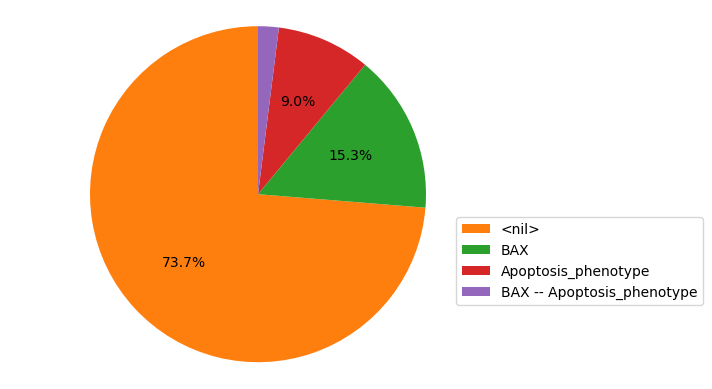

In [49]:
# Simulate - ALL nodes get 50% probability of ON (or OFF) at the start > probability of ending in each phenotype.
all_nodes_50_ON_model = model.copy()
# Extract the initial ON/OFF probabilities for all nodes (before we apply changes)
df_before = tabulate_node_prob(all_nodes_50_ON_model)

for node in all_node_names:
    all_nodes_50_ON_model.network.set_istate(node, [0.5,0.5])
# Extract the initial ON/OFF probabilities for all nodes (after we apply changes)
df_after = tabulate_node_prob(all_nodes_50_ON_model)

# Combine the two tables to make sure we've applied the intended changes
df_compare = df_before.merge(df_after, on="Node", suffixes=("_before", "_after"))
print(df_compare)

res_all_nodes_50_ON = all_nodes_50_ON_model.run()
res_all_nodes_50_ON.plot_piechart()

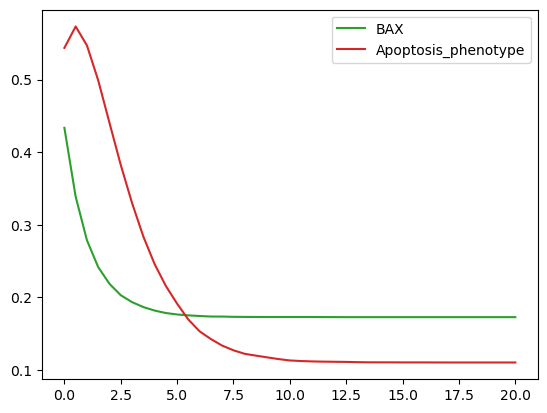

In [47]:
# Simulate - ALL nodes get 50% possibilty of ON (or OFF).
# This plot is node-level, showing how fast (x=time) each node becomes ON.
res_all_nodes_50_ON.plot_node_trajectory(until=20)

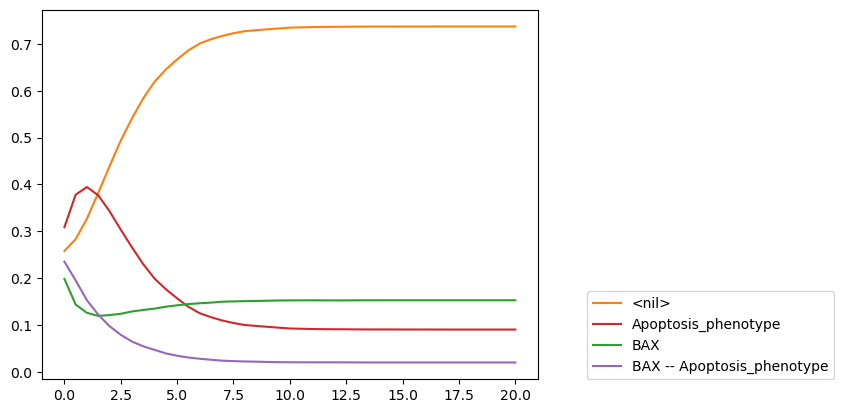

In [48]:
# Simulate - ALL nodes get 50% possibilty of ON (or OFF).
# This plot is model-level, showing the fractions of cells end up in different fates over time.
res_all_nodes_50_ON.plot_trajectory(until=20)

In [53]:
from maboss.pipelines import simulate_single_mutants, filter_sensitivity
import matplotlib.pyplot as plt

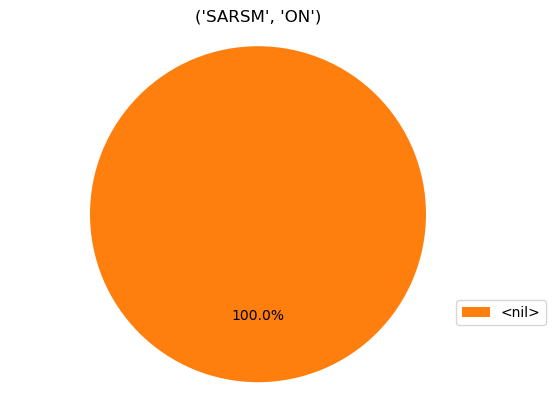

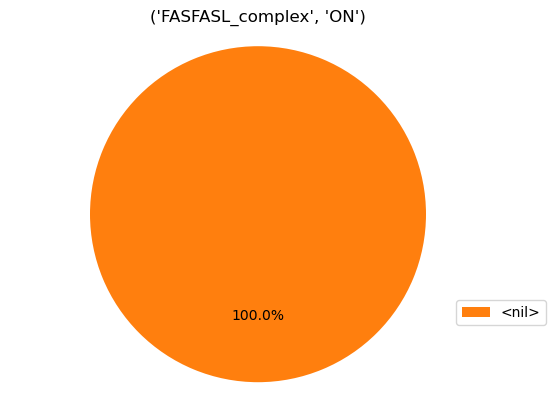

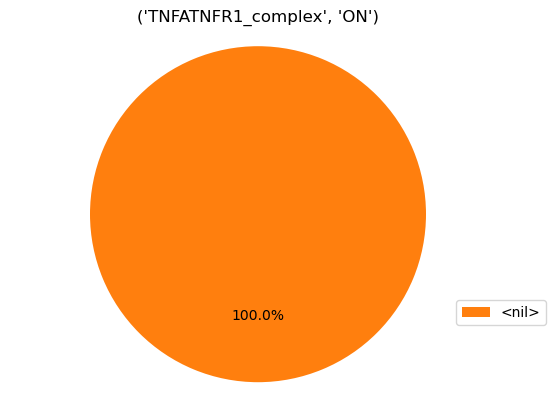

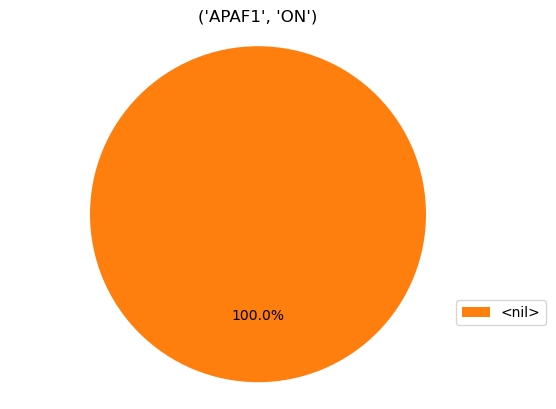

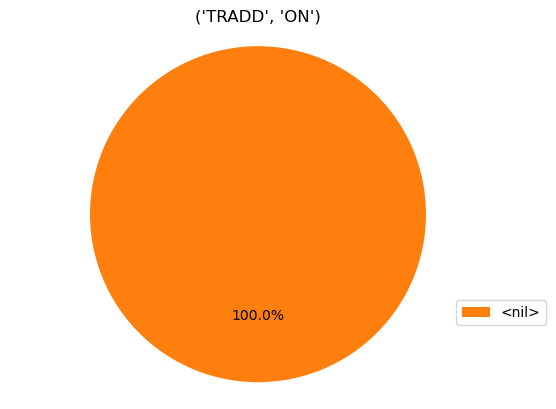

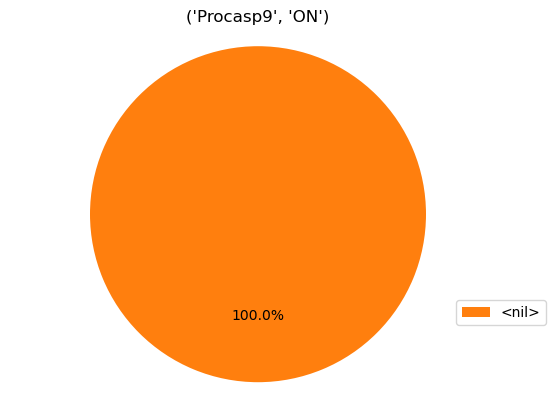

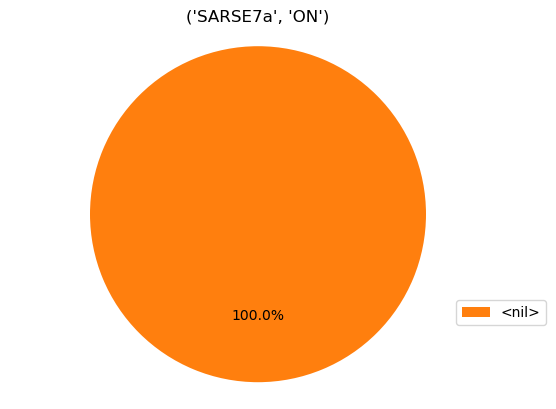

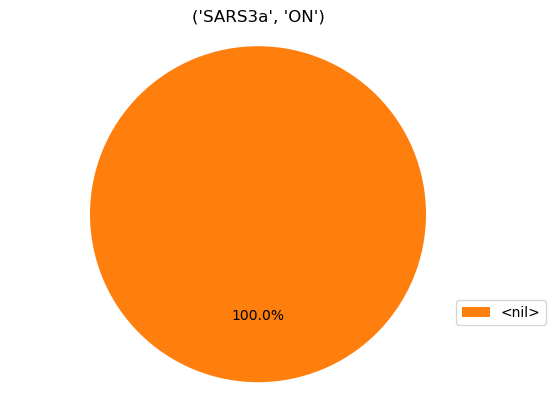

In [58]:
# Caution: the built-in sensitivity analysis may not be ideal for scanning Input nodes.
# the sensitivity analysis is instead for internal nodes.
# Note: in the answer template, the candidate_nodes are all internal nodes, not input nodes.

# Simulate through each input node one at a time (ON)
model_individual_ON = model.copy()
simulation_individual_ON = simulate_single_mutants(model_individual_ON, input_nodes, 'ON')
df_compare = df_before.merge(df_after, on="Node", suffixes=("_before", "_after"))
for simulation_individual_ON, result in simulation_individual_ON.items():
    result.plot_piechart()
    plt.title(simulation_individual_ON)

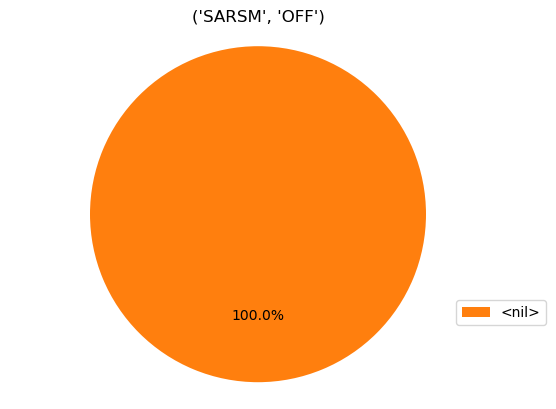

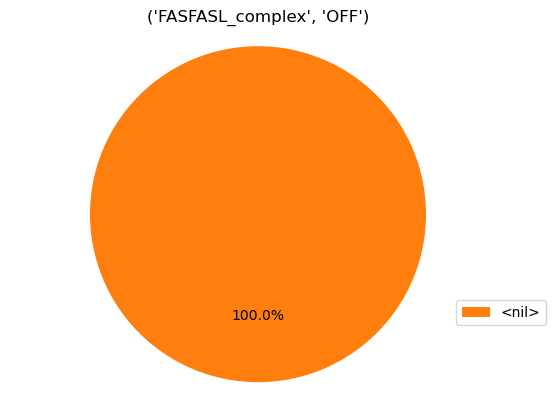

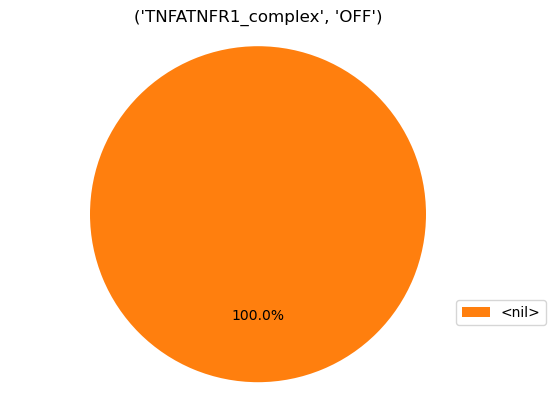

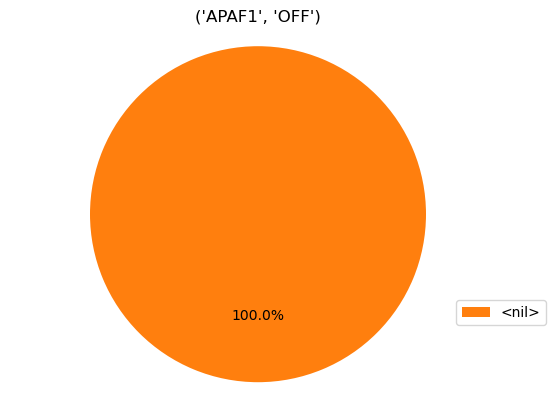

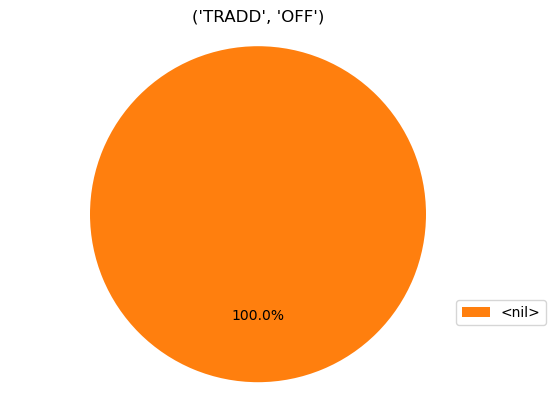

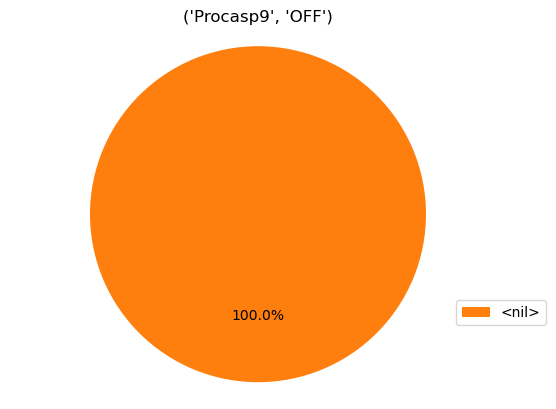

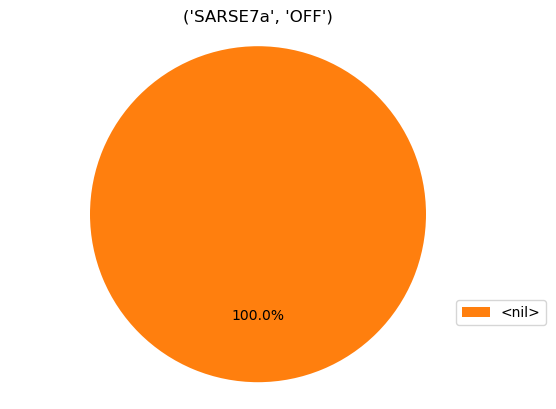

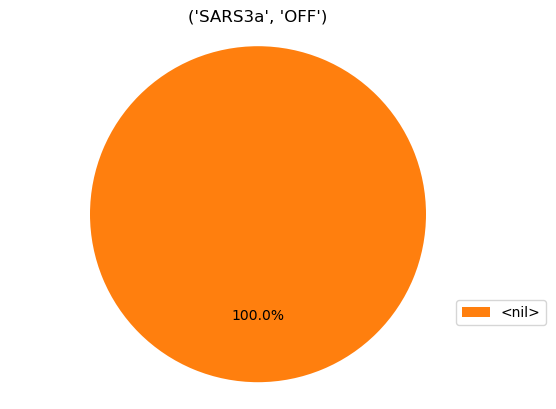

In [81]:
# Simulate through each input node one at a time (OFF)
model_individual_OFF = model.copy()
simulation_individual_OFF = simulate_single_mutants(model_individual_OFF, input_nodes, 'OFF')
for simulation_individual_OFF, result in simulation_individual_OFF.items():
    result.plot_piechart()
    plt.title(simulation_individual_OFF)

In [86]:
from maboss.pipelines import simulate_double_mutants

/home/manager/miniconda/envs/WCS2025/lib/python3.14/site-packages/maboss/results/baseresult.py:102: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, axes = plt.subplots(1,1)


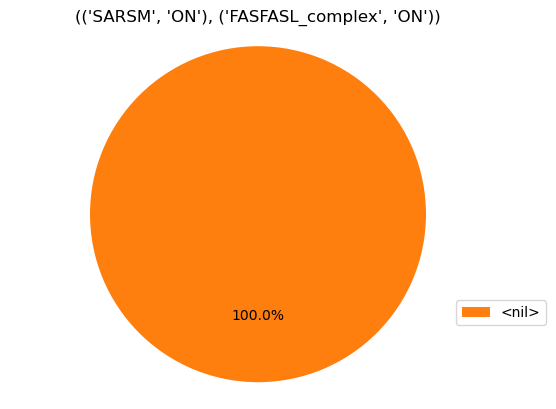

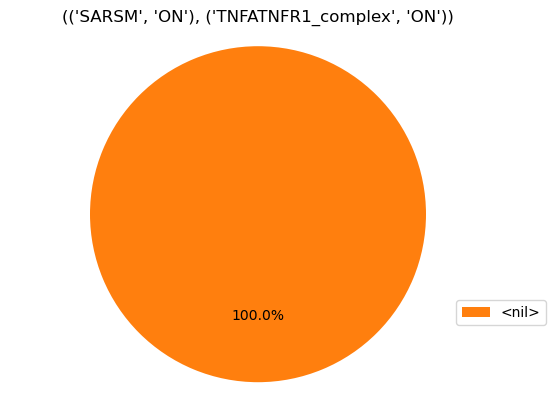

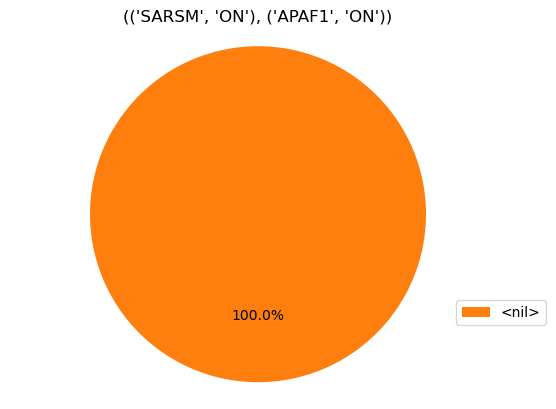

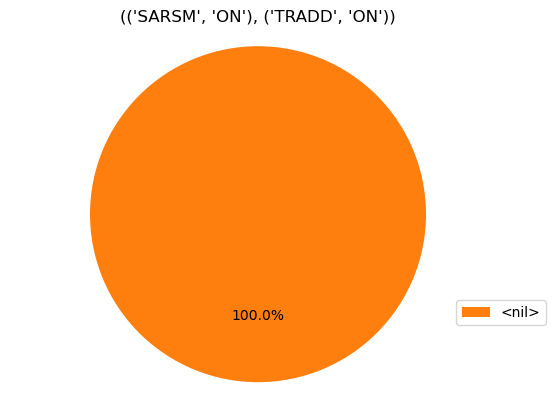

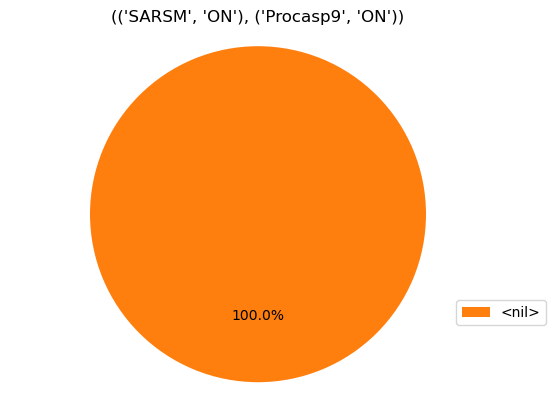

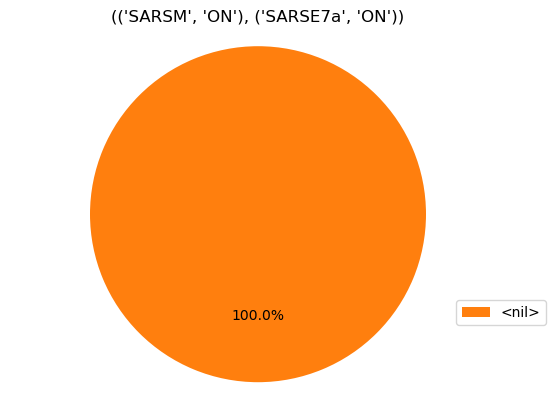

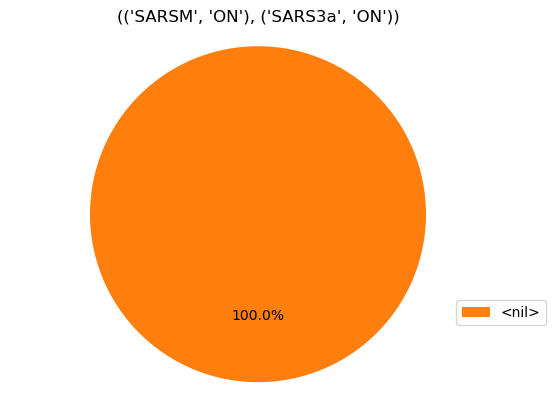

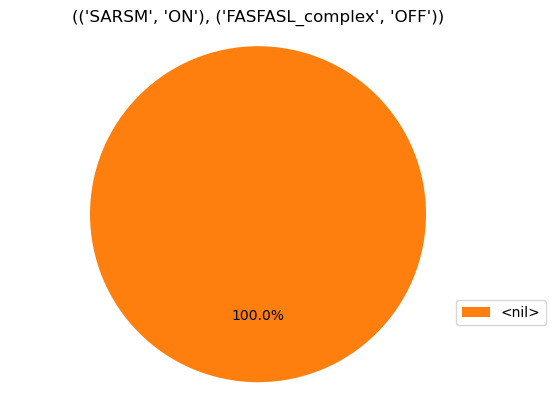

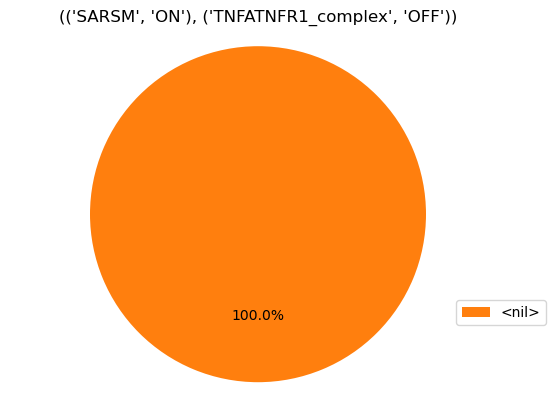

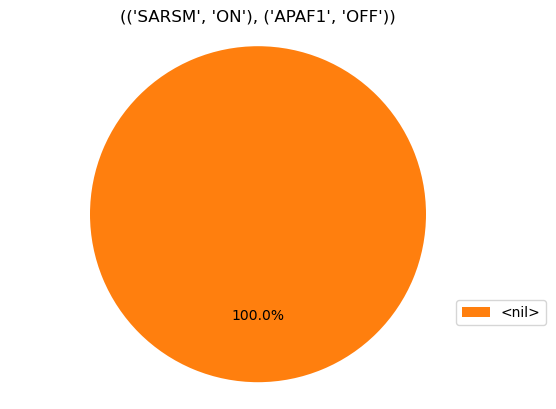

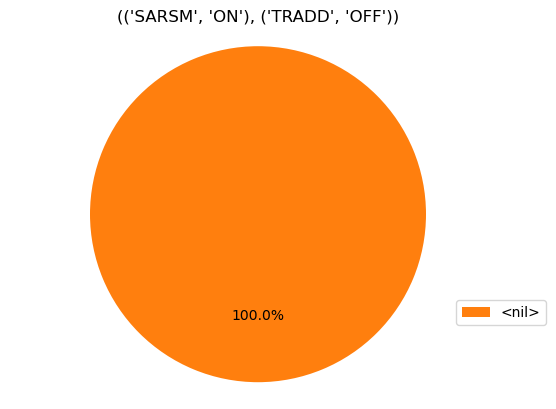

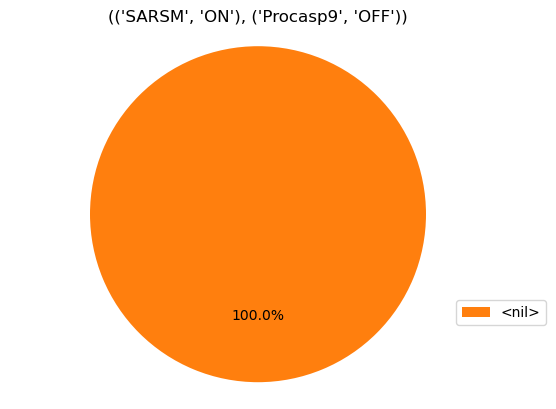

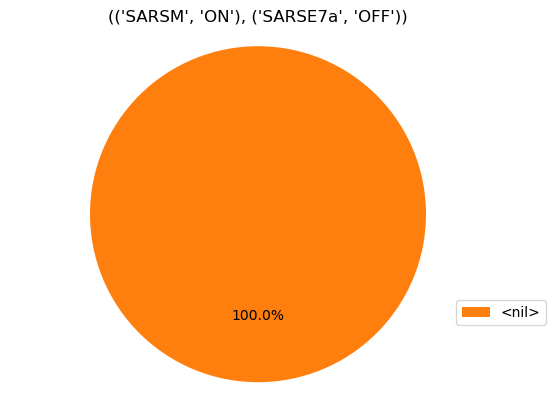

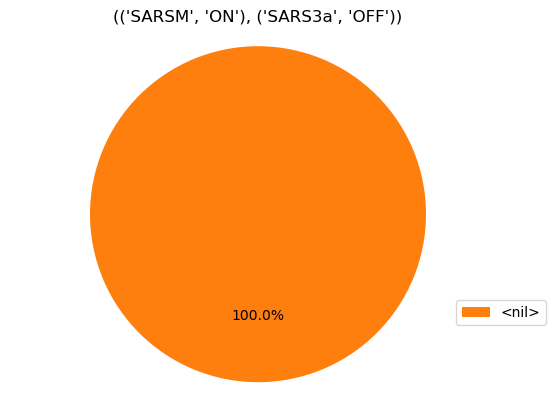

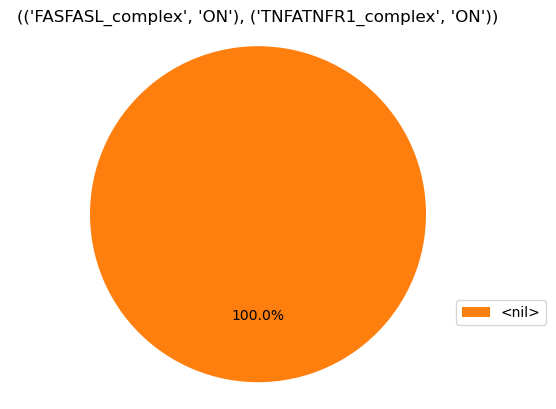

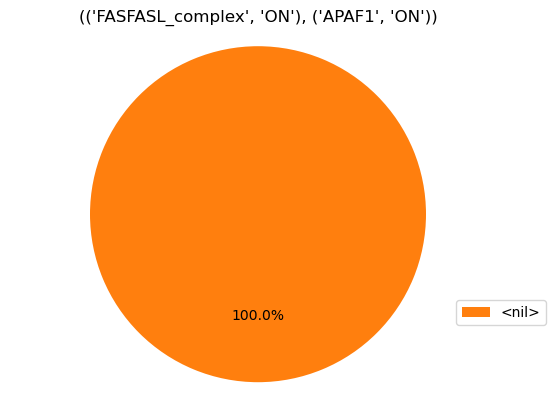

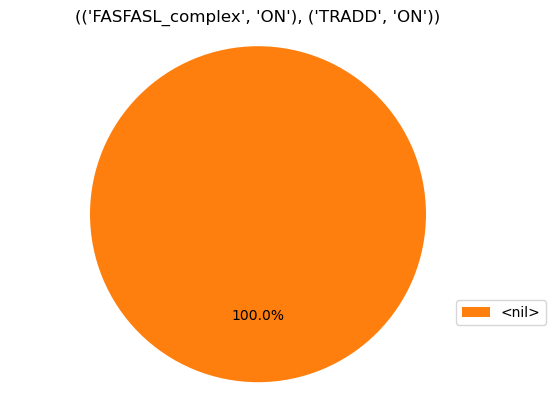

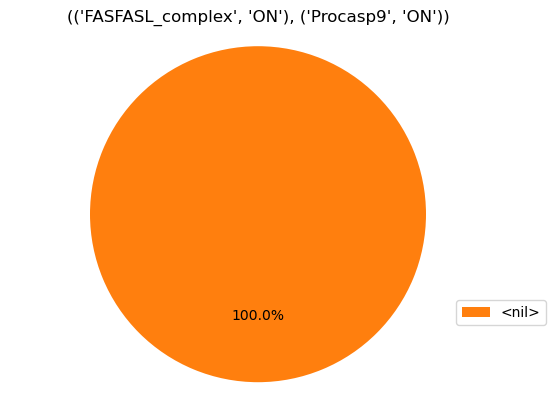

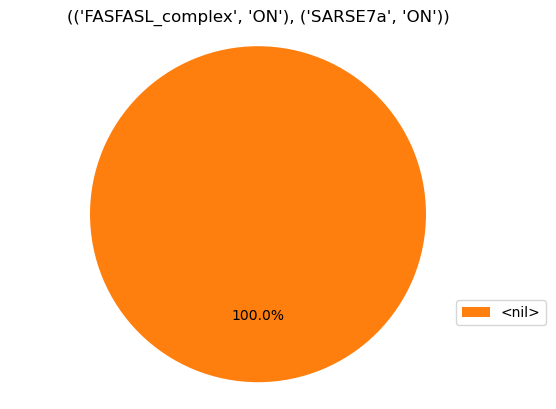

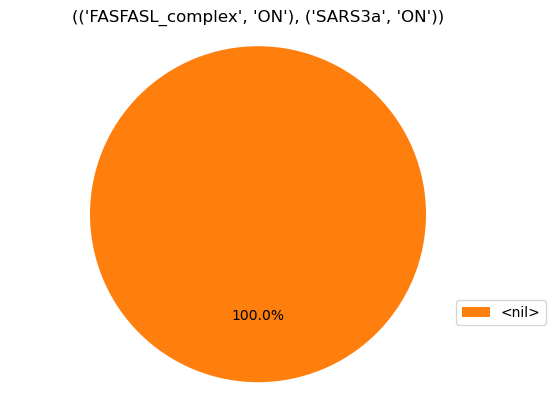

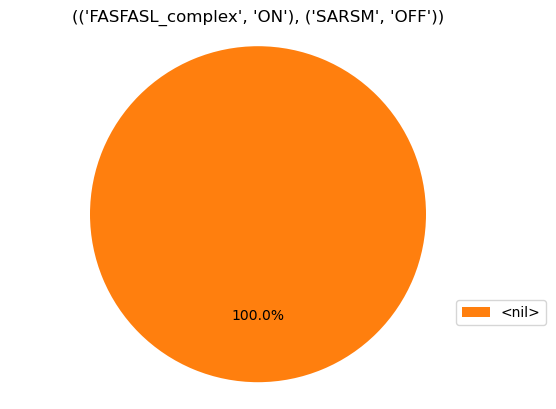

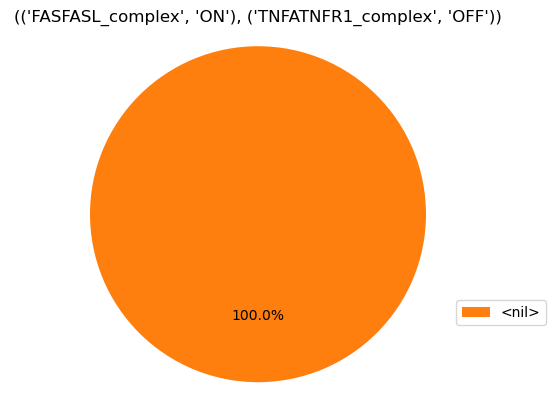

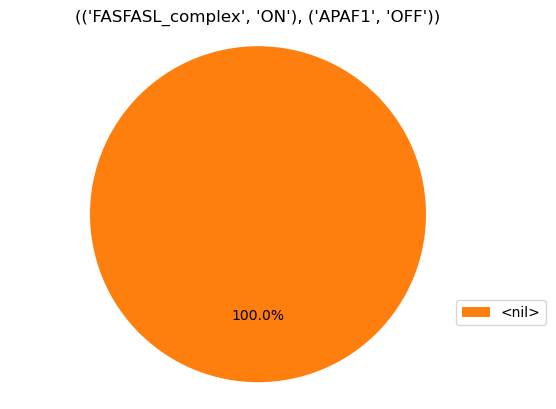

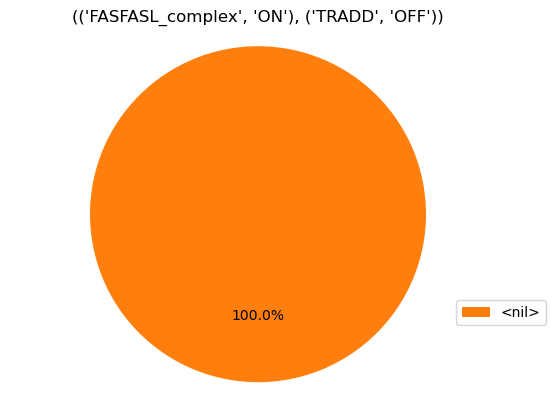

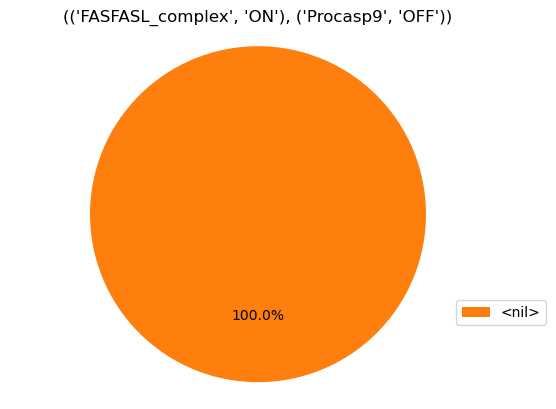

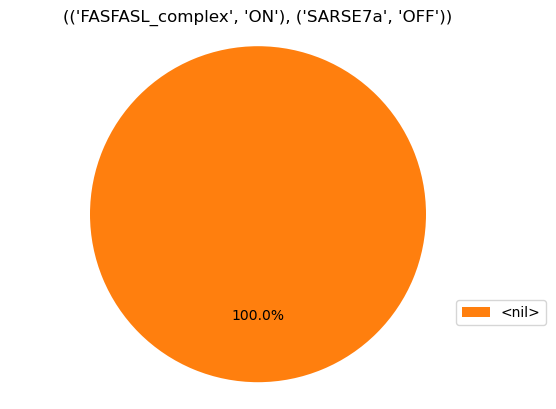

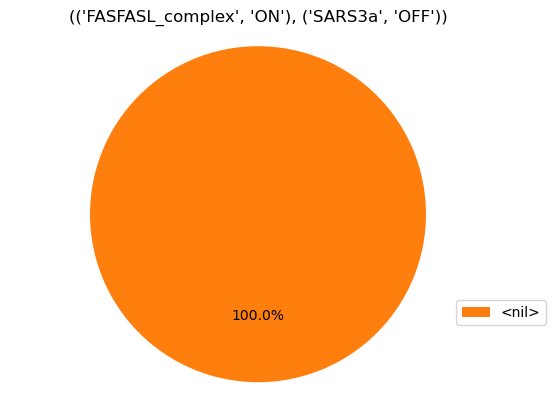

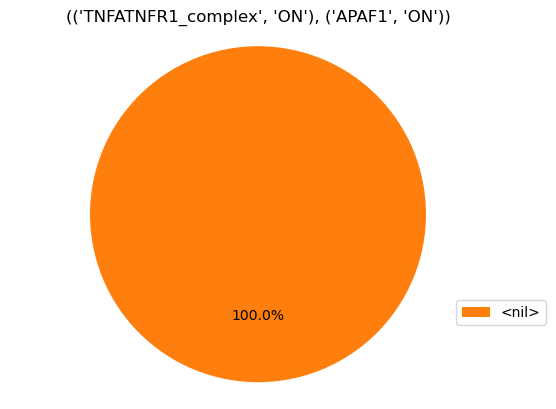

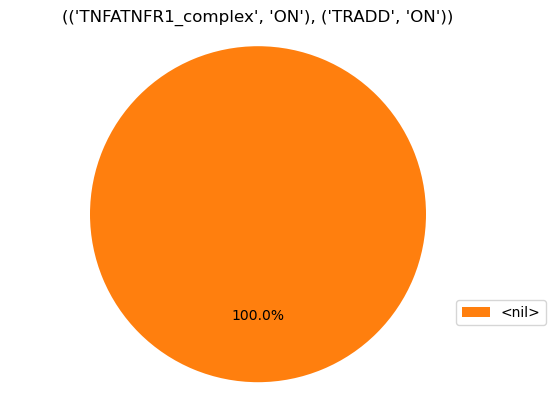

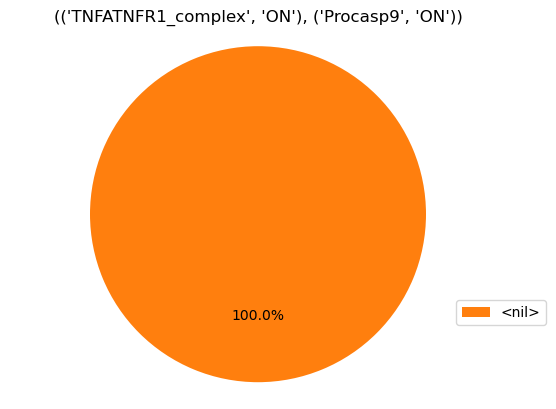

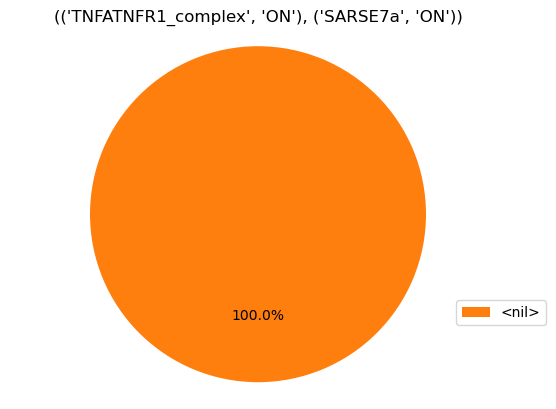

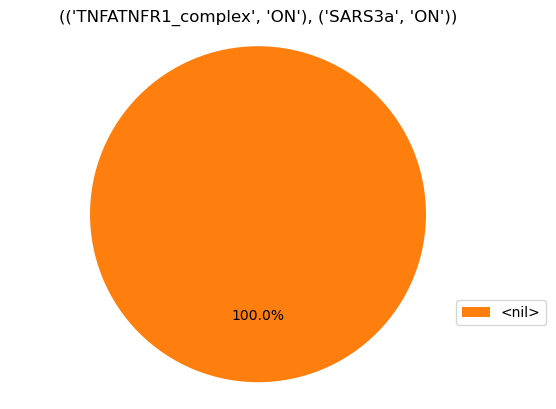

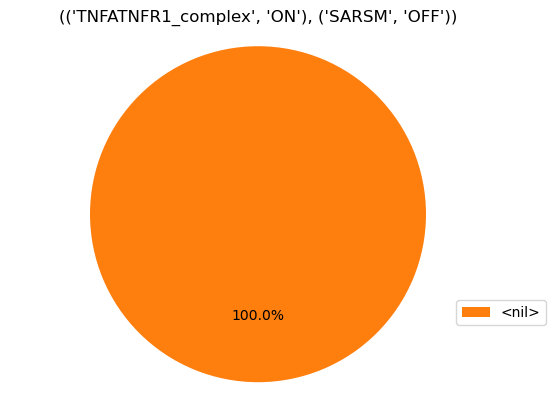

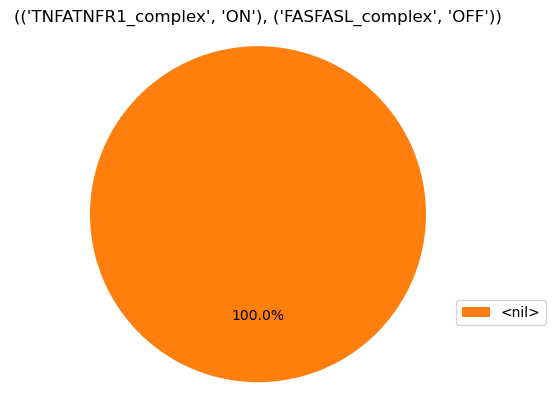

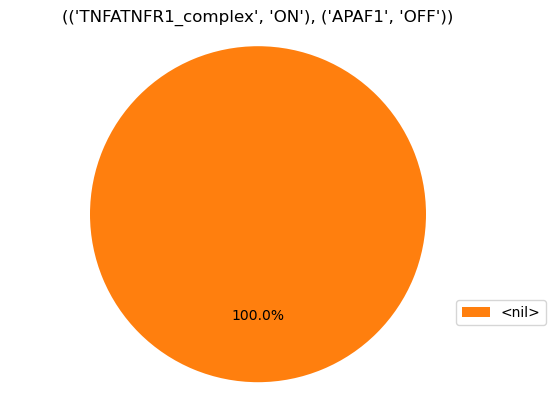

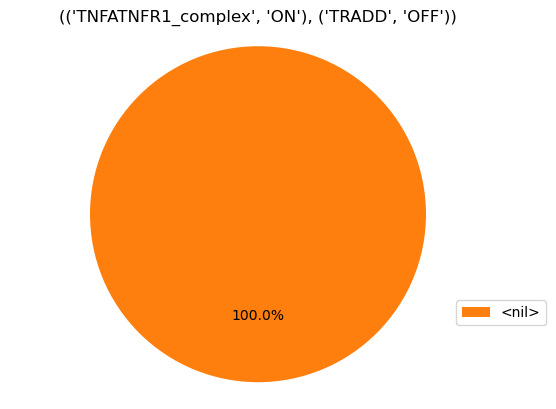

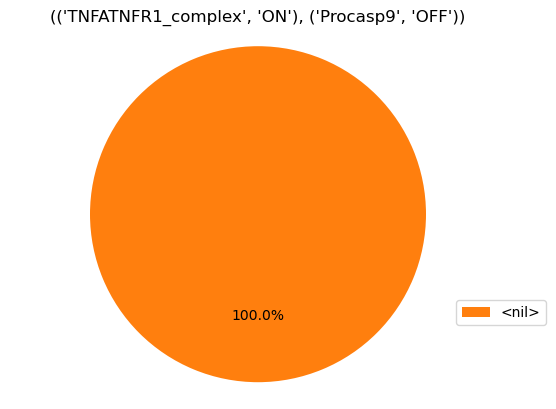

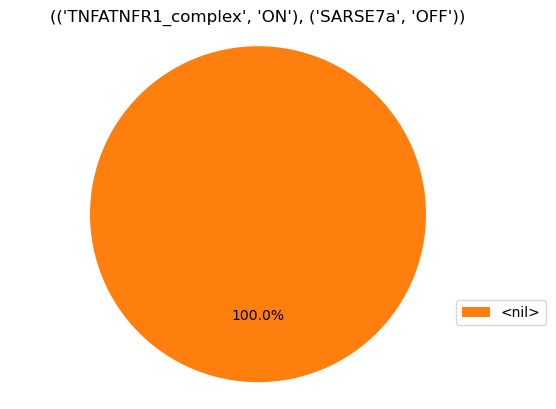

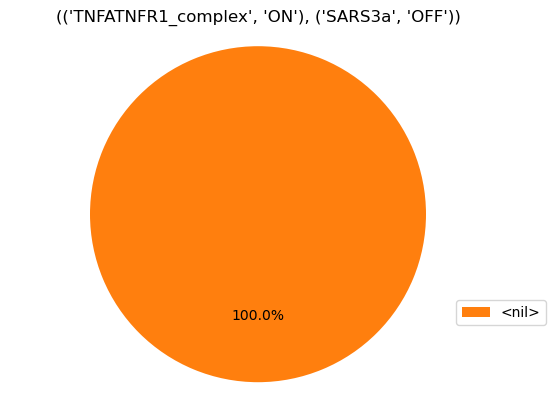

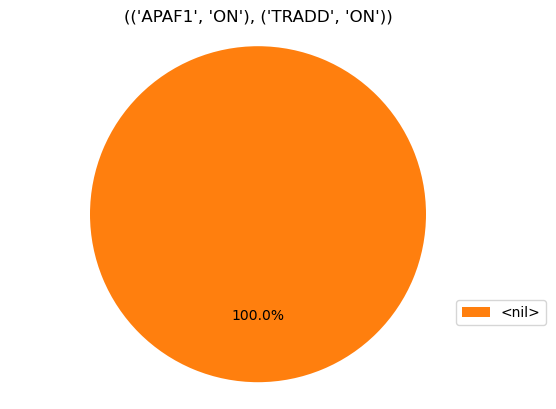

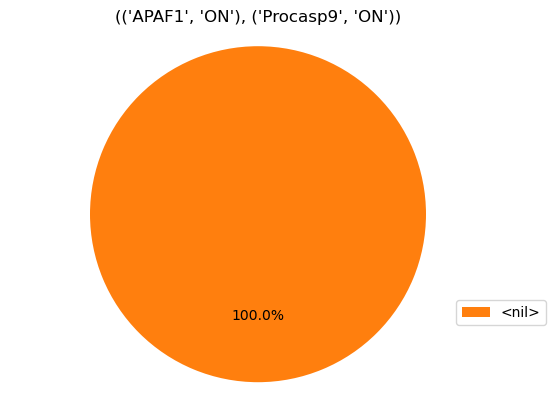

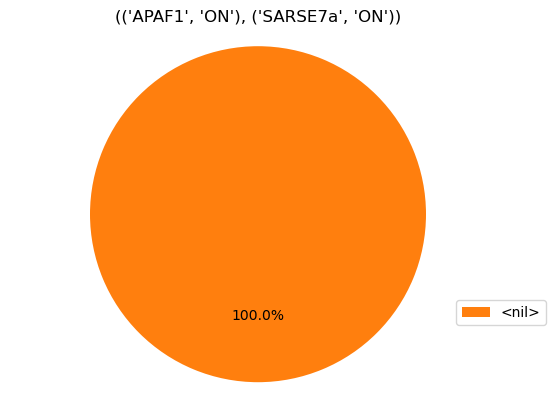

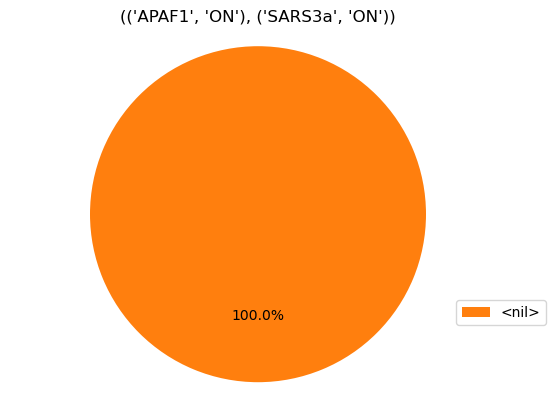

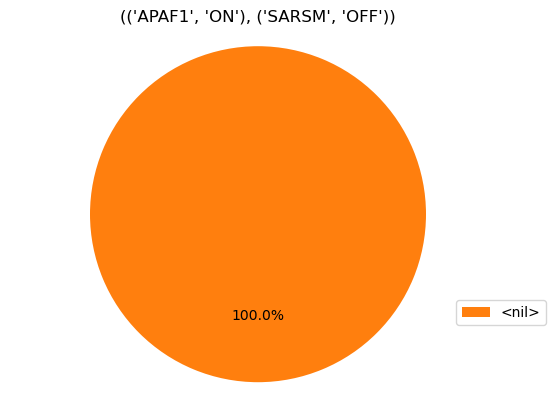

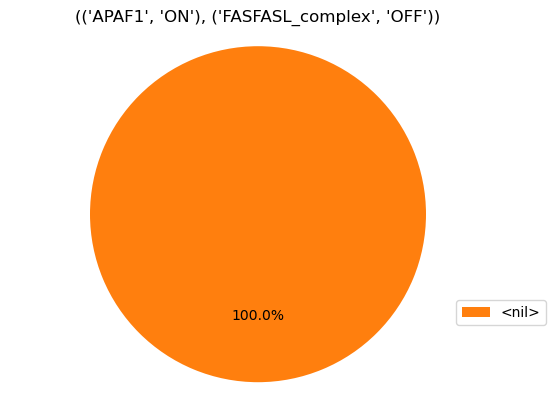

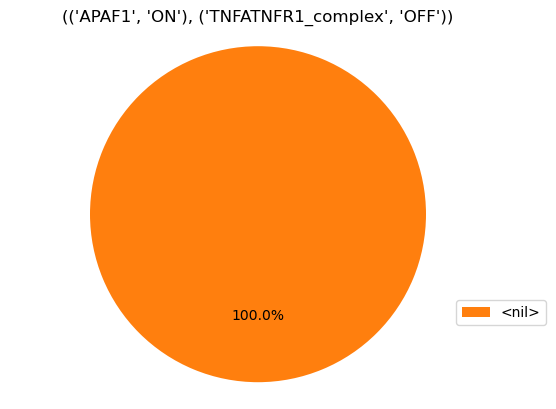

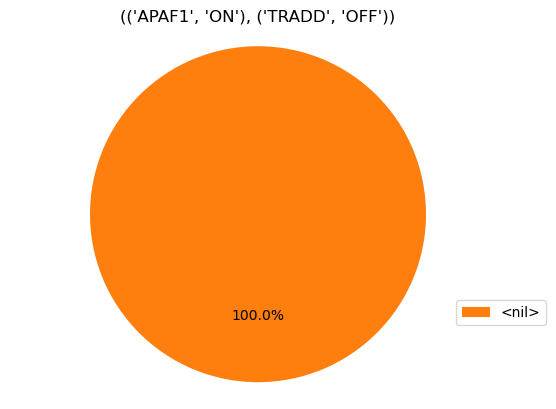

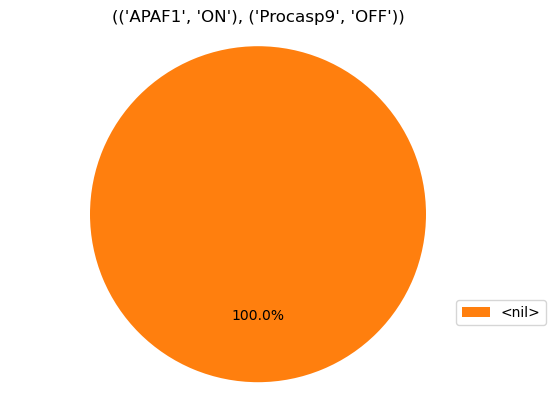

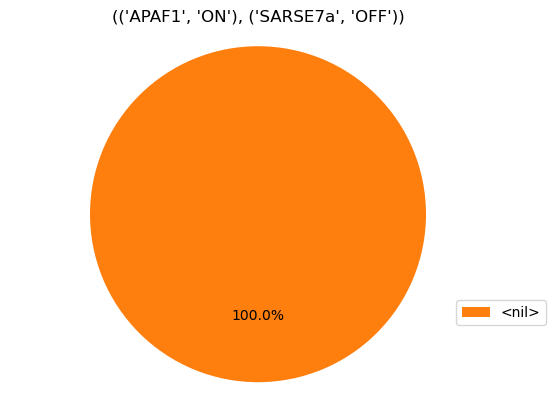

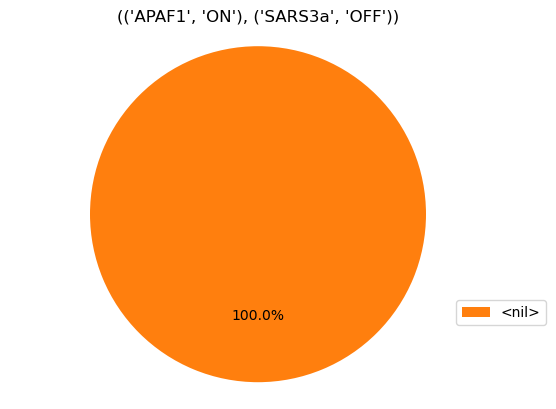

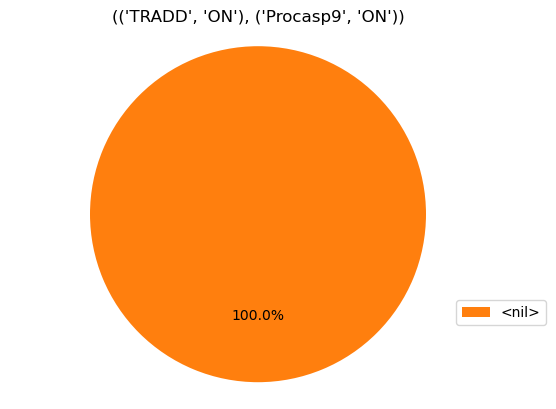

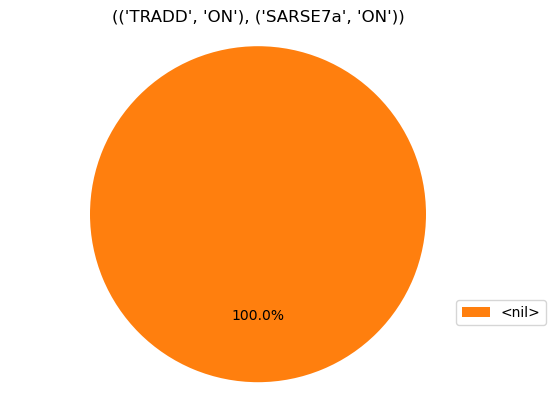

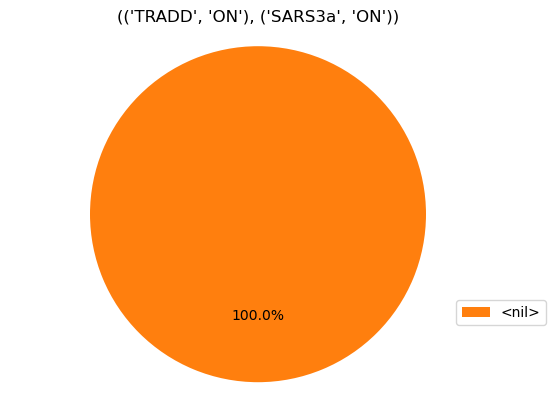

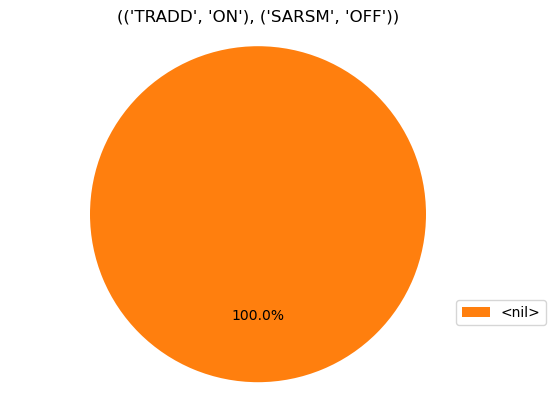

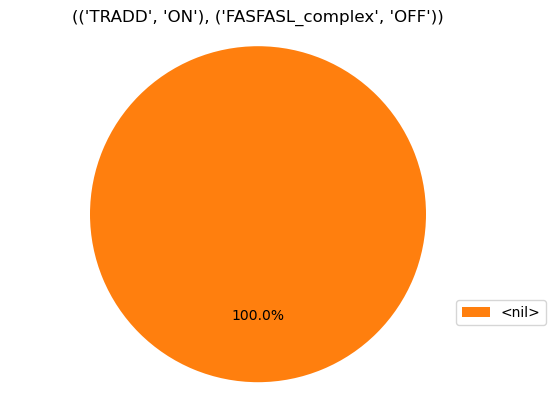

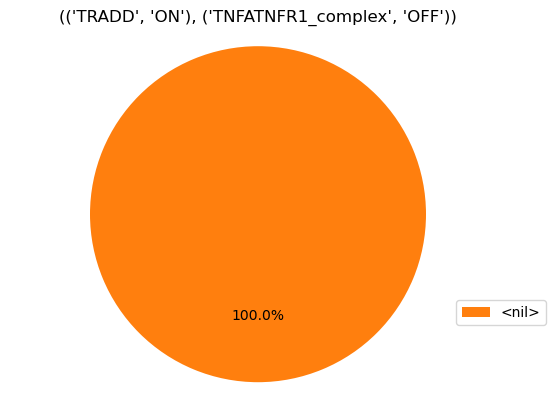

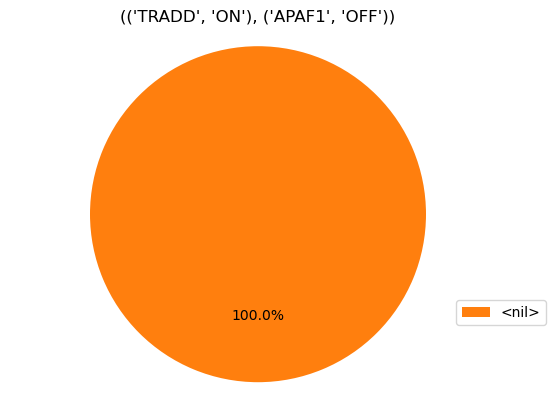

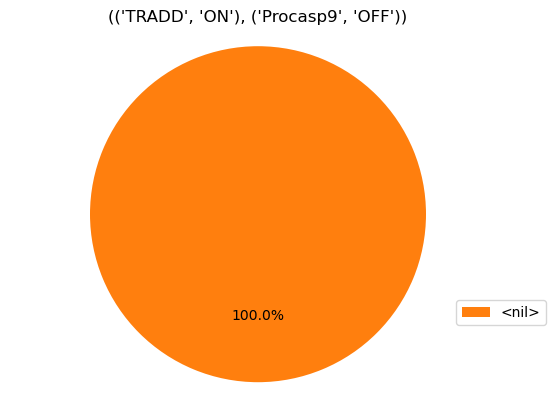

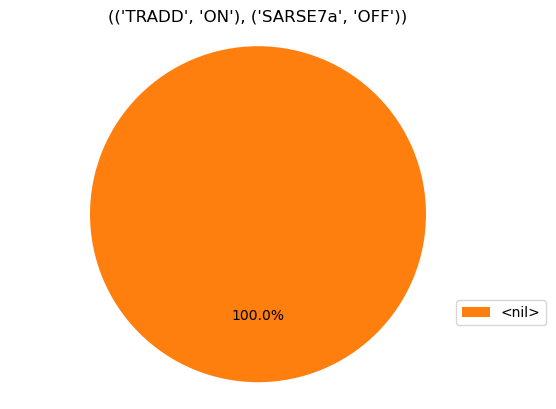

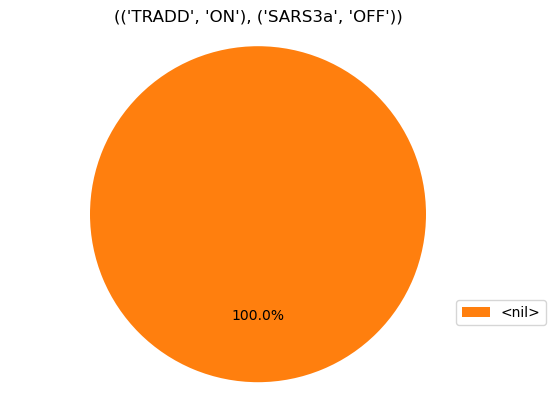

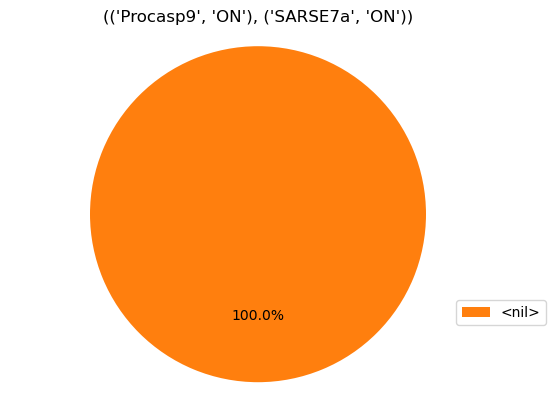

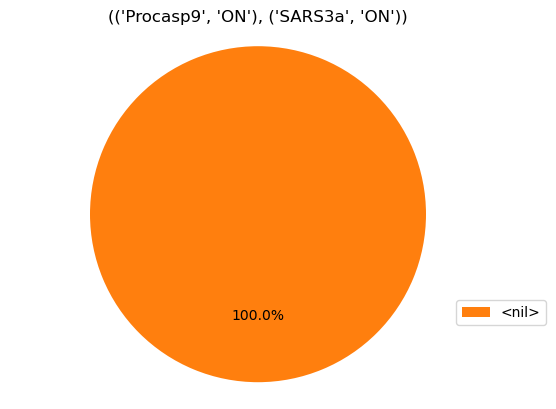

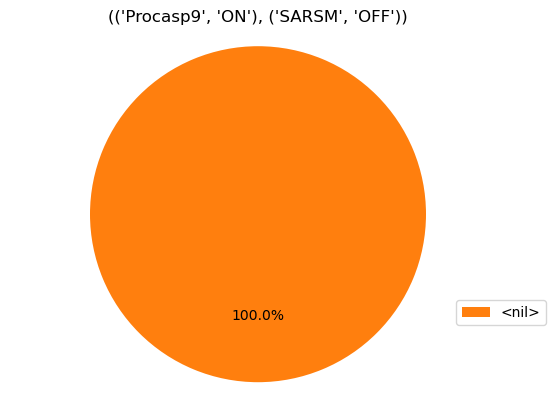

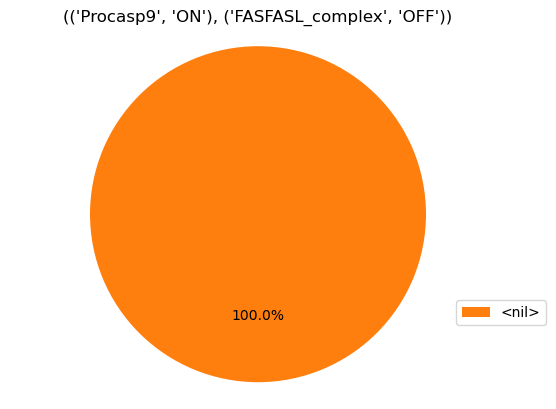

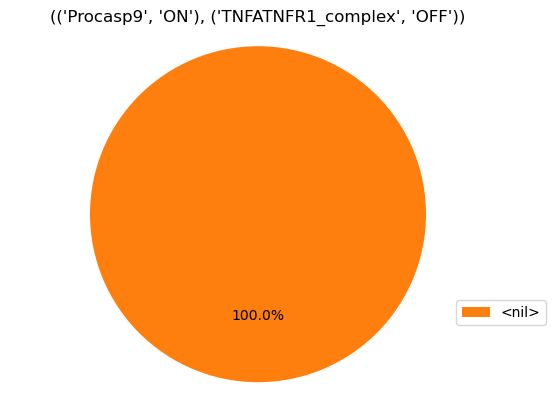

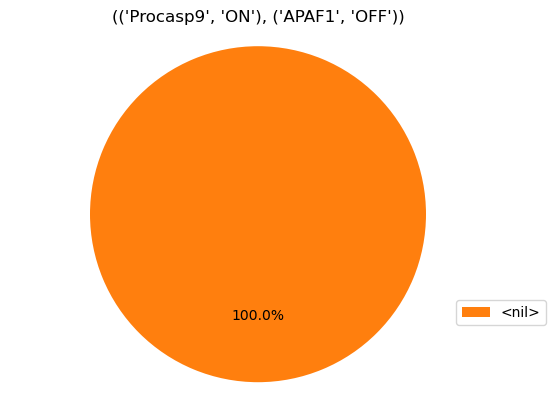

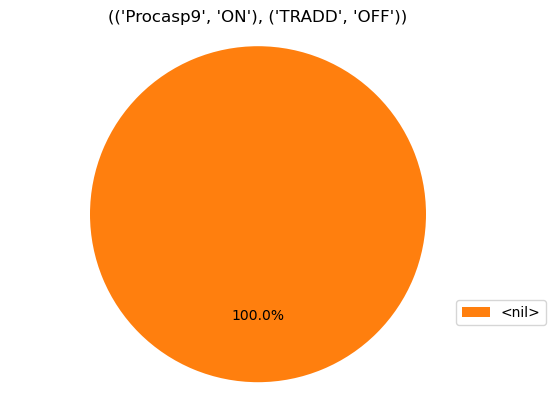

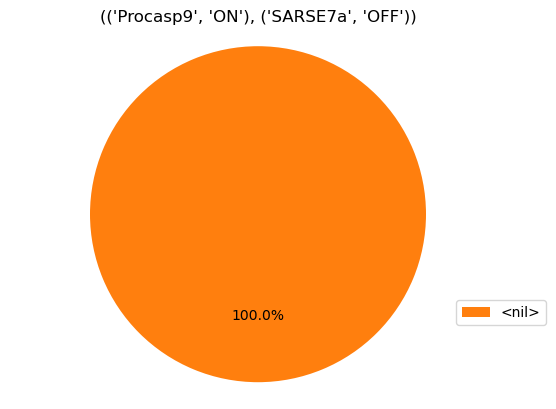

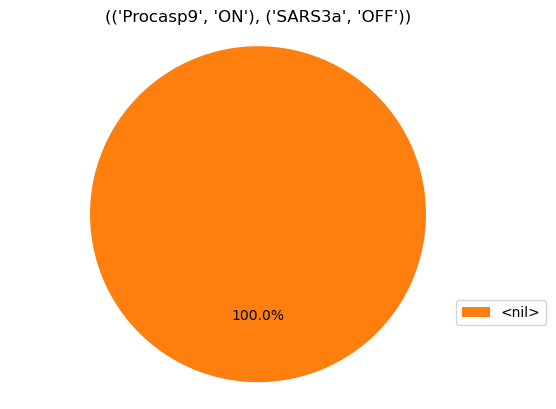

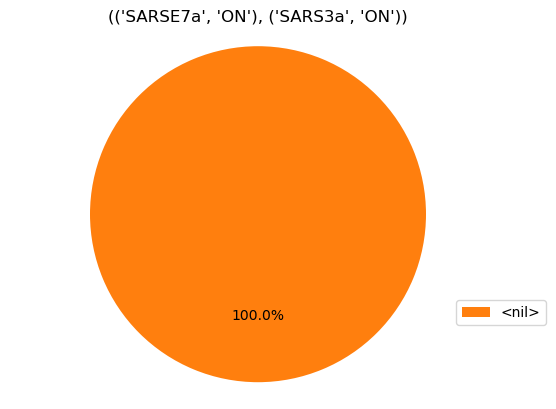

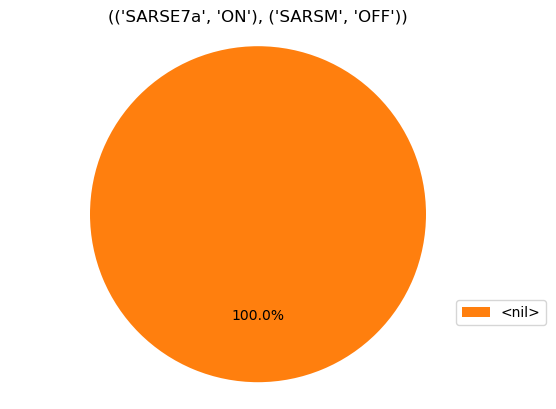

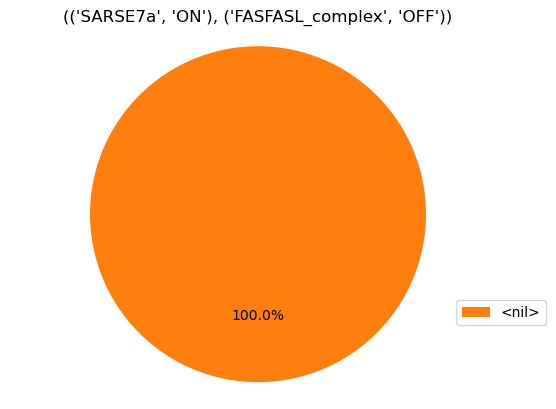

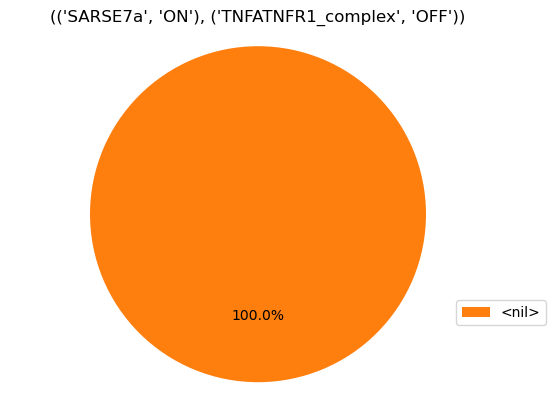

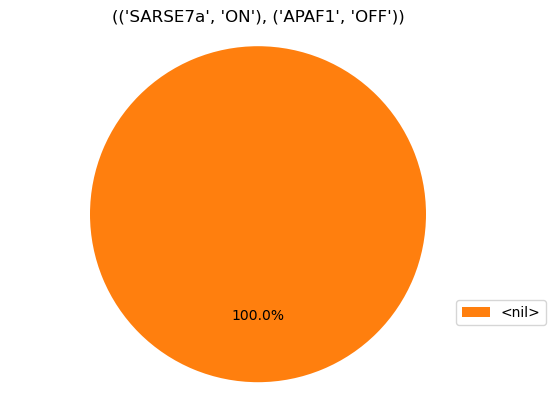

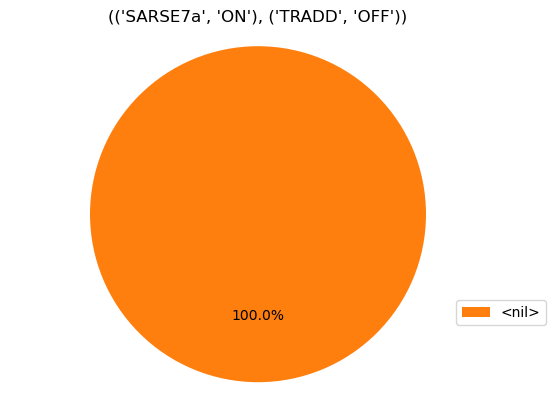

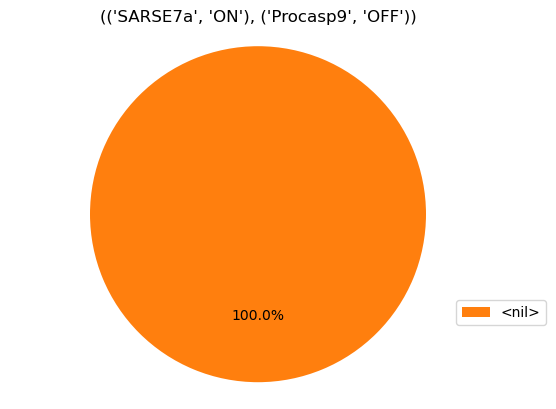

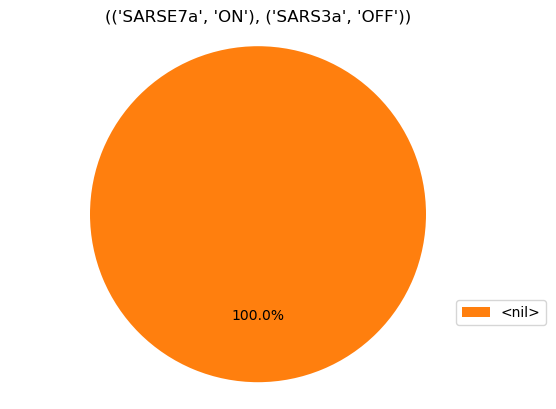

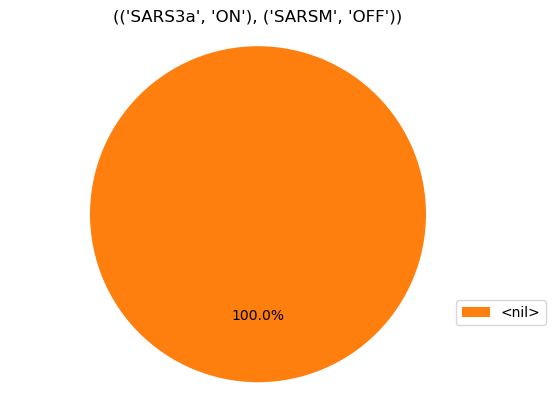

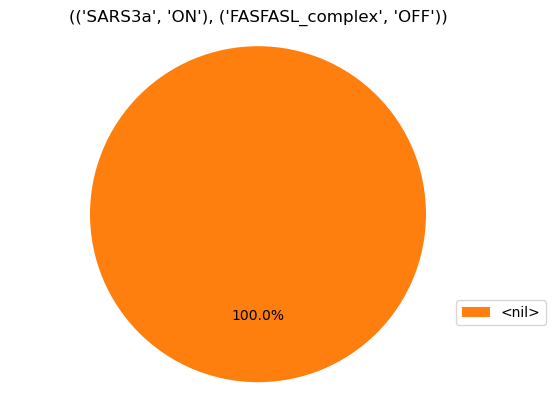

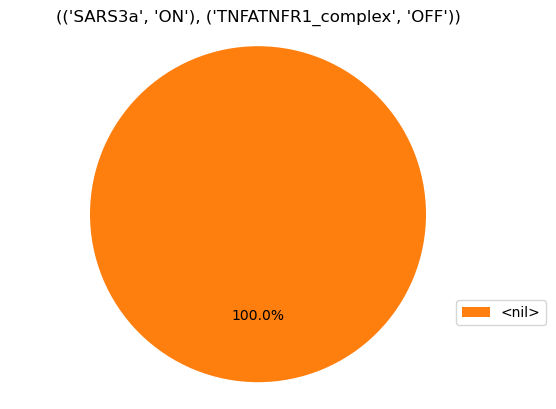

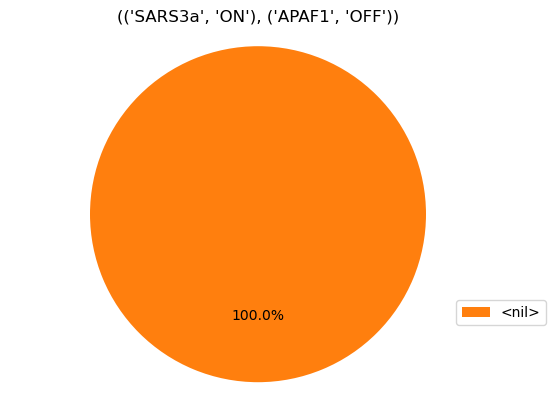

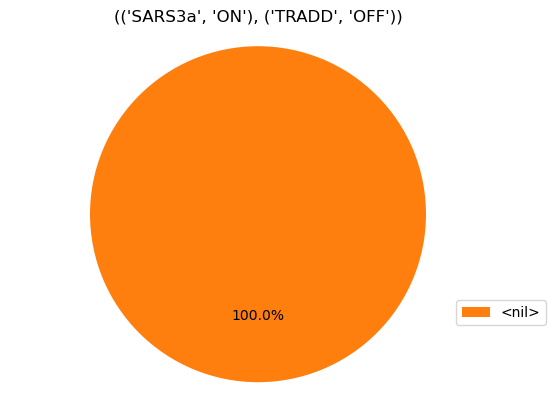

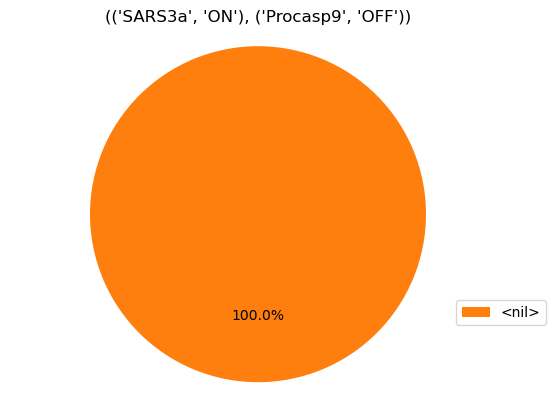

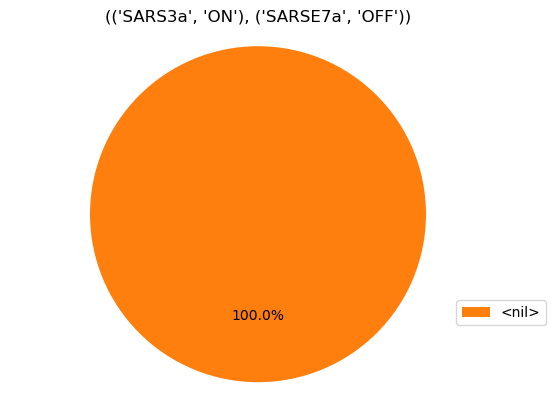

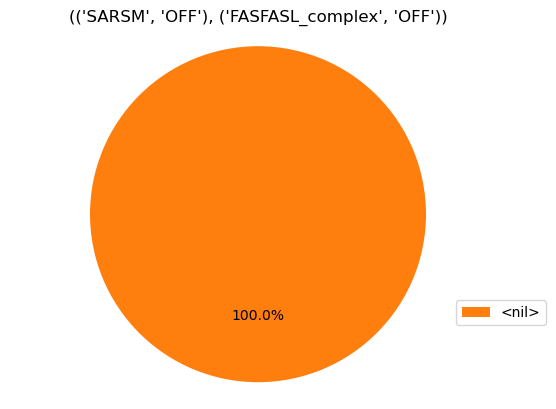

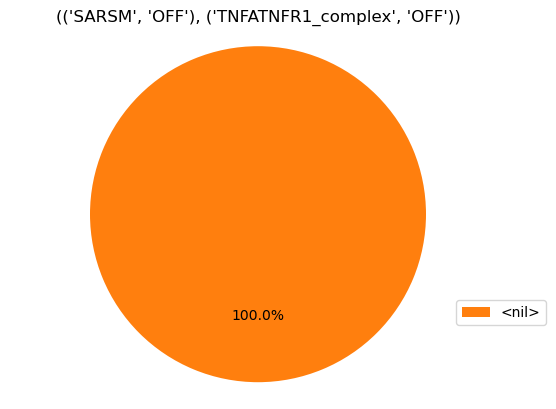

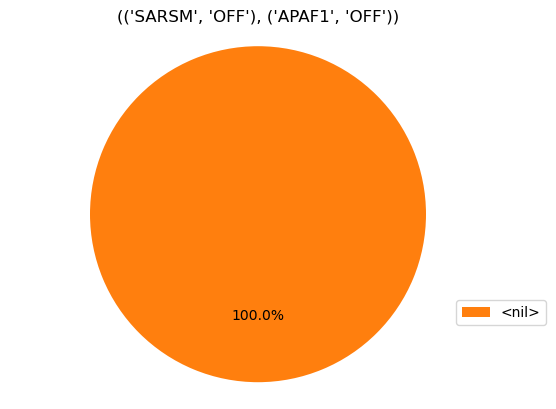

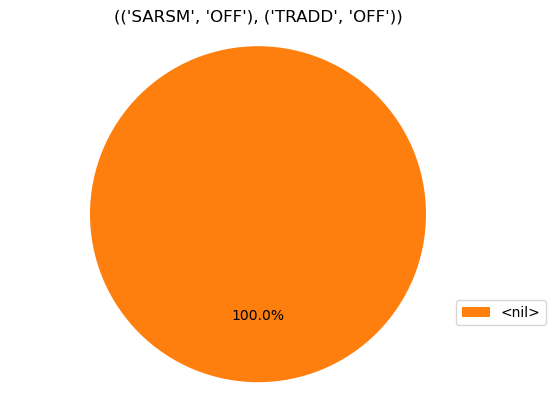

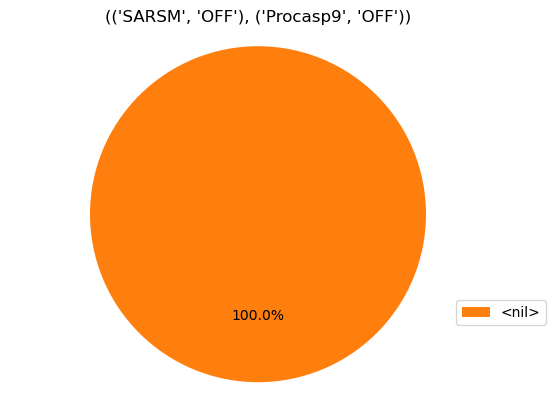

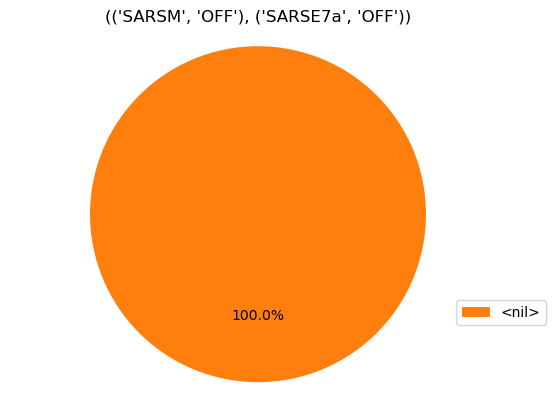

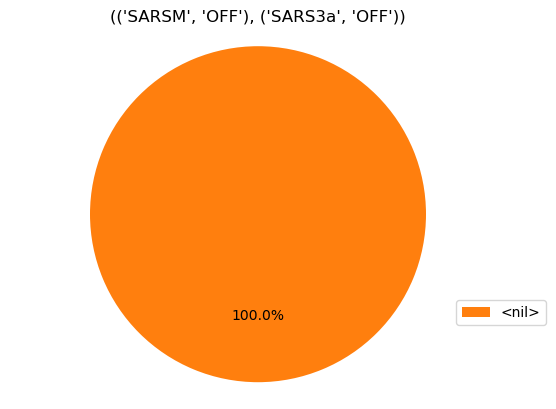

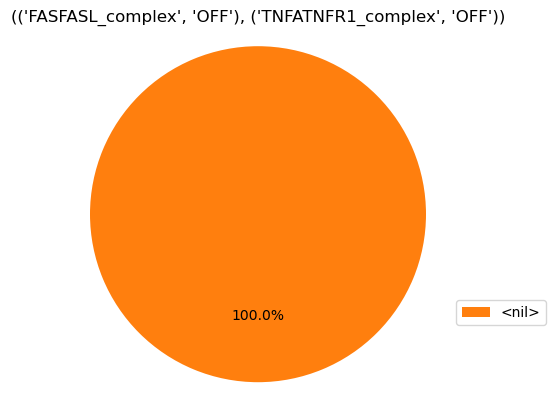

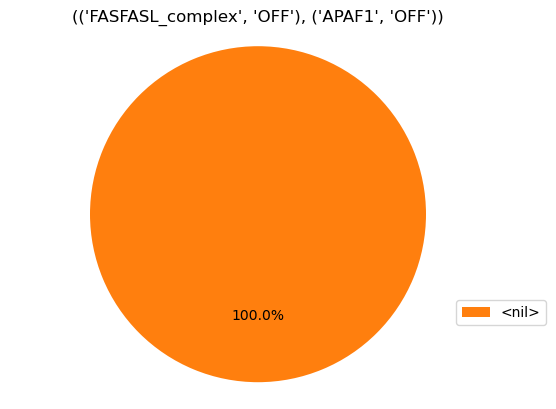

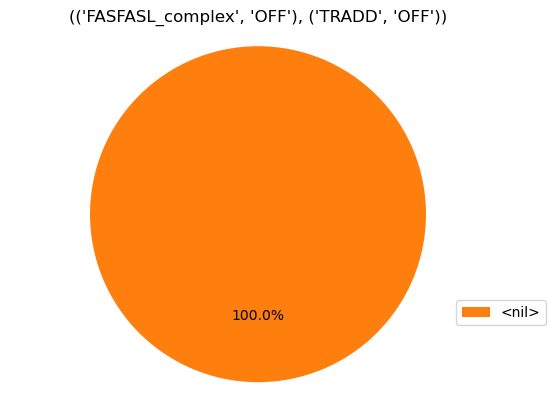

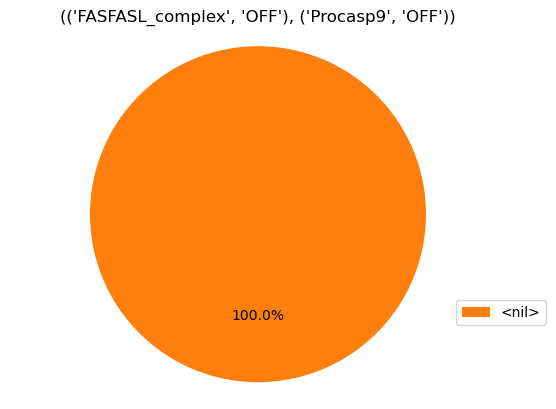

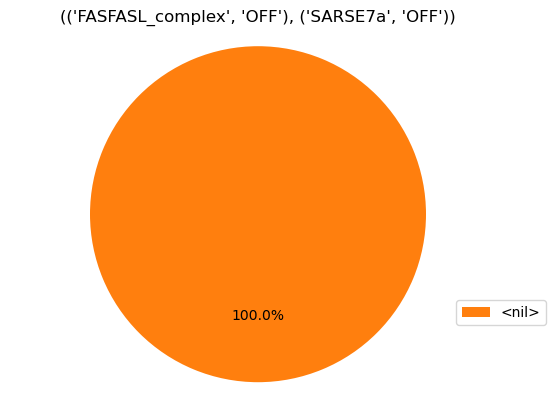

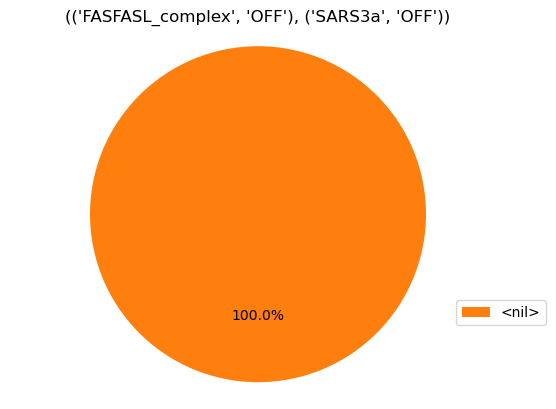

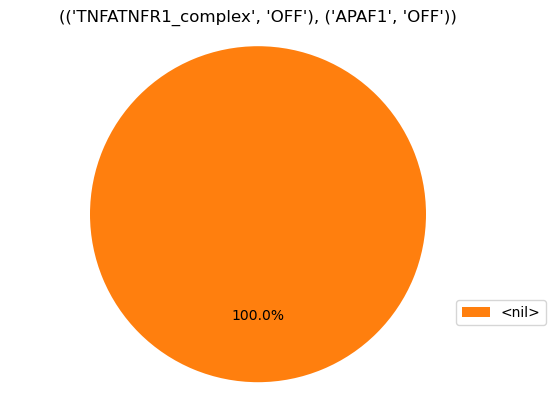

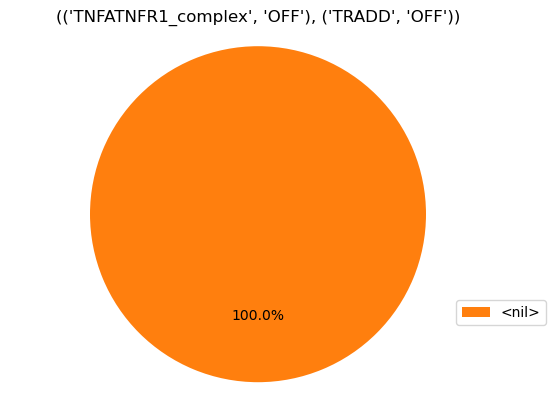

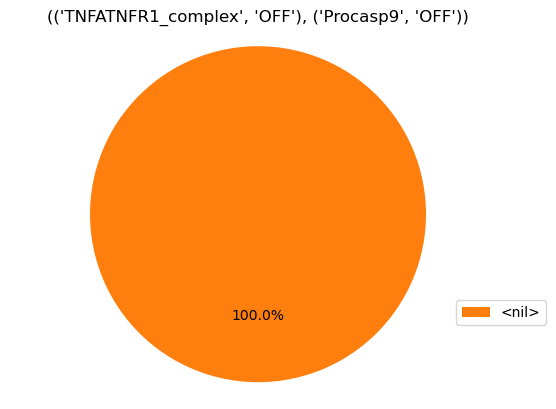

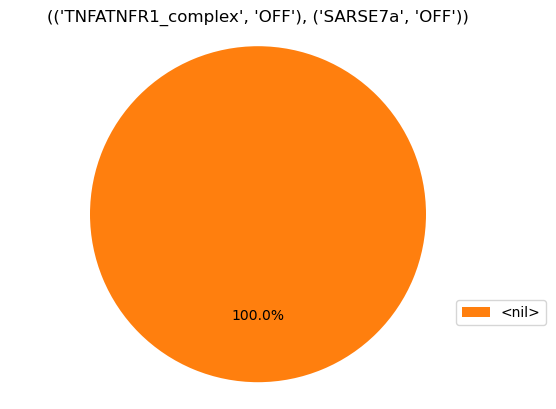

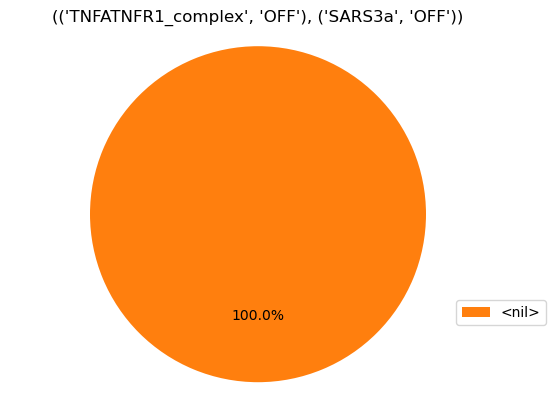

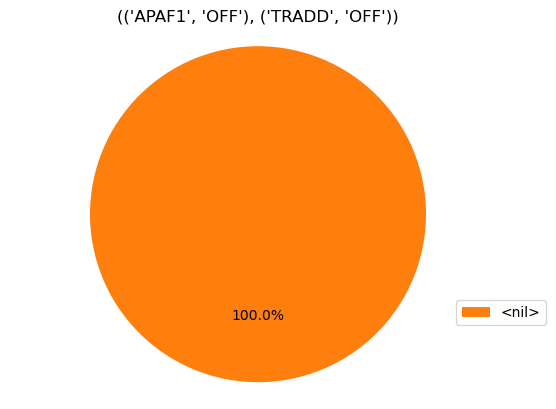

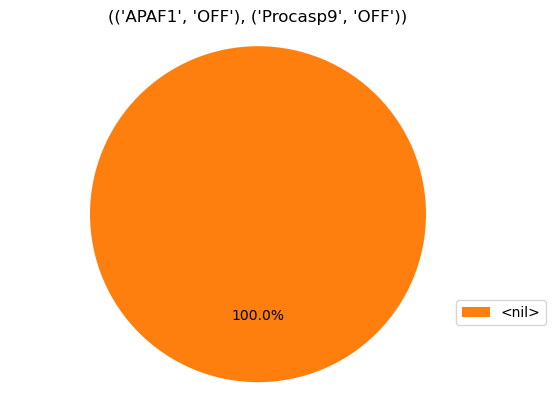

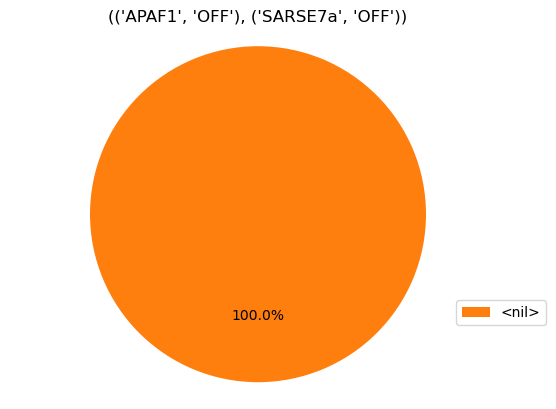

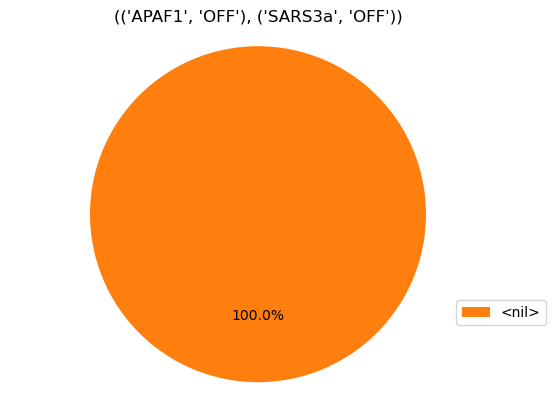

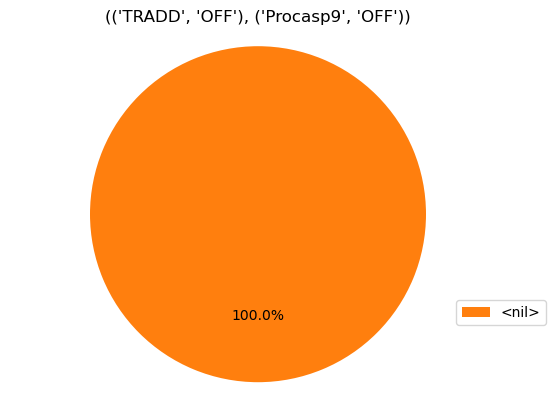

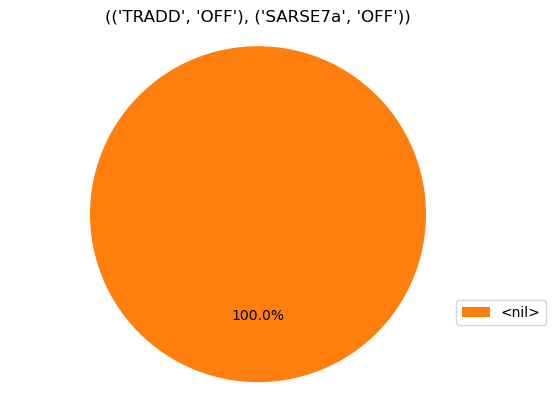

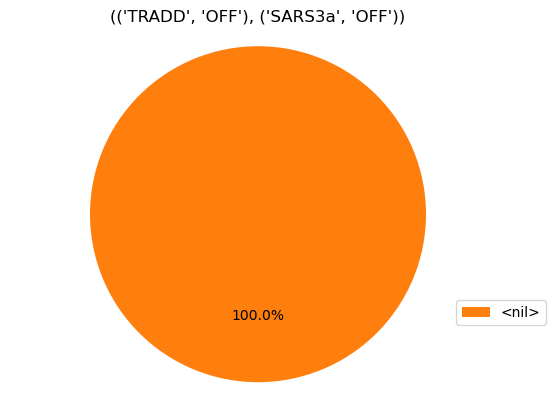

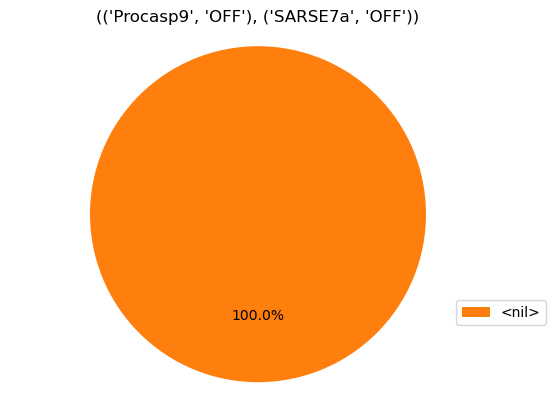

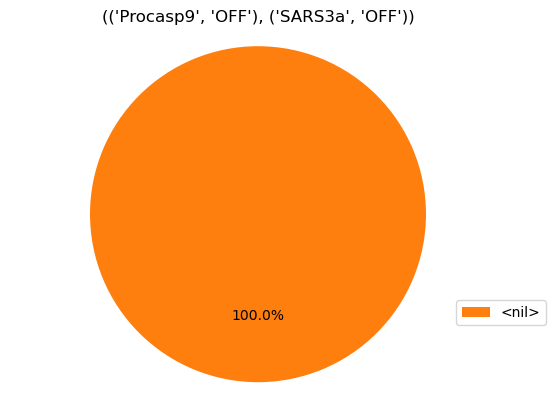

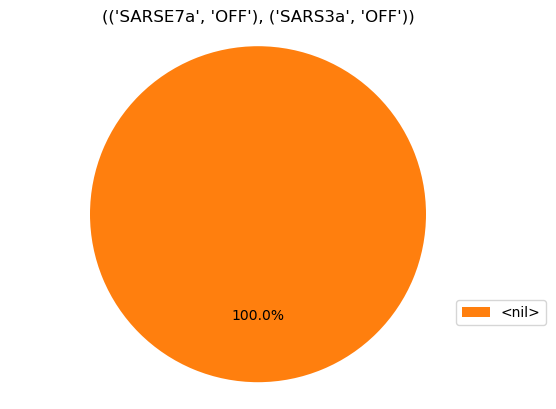

In [88]:
# Simulate through each input node TWO at a time
model_double_ONOFF = model.copy()
simulation_double_ONOFF = simulate_double_mutants(model_double_ONOFF, input_nodes, sign='BOTH', cmaboss=False)
for simulation_double_ONOFF, result in simulation_double_ONOFF.items():
    result.plot_piechart()
    plt.title(simulation_double_ONOFF)

In [ ]:
# Ignore below for now

In [ ]:
import math
import itertools
import pandas as pd

In [69]:
# Whether a SINGLE input activates apoptosis.
single_input_model = model.copy()
single_input_results = {}
# Iterature through all input nodes, One at a time.
for single_input_node in input_nodes:
    # we need to turn off other nodes (otherwise we get increasing ON nodes)
    for n in input_nodes: 
        single_input_model.network.set_istate(n, [1, 0])
    single_input_model.network.set_istate(single_input_node, [0, 1])
    res_single_input_model = single_input_model.run()
    df = res_single_input_model.get_states_probtraj()
    # Compute probibility of Apoptosis ON
    apoptosis_on = df.loc[:, df.columns.str.contains(f'Apoptosis_phenotype')].sum().sum()
    single_input_results[single_input_node] = (1-apoptosis_on, apoptosis_on)

df = pd.DataFrame([
    {'Inputs': single_input_node, 'p_apoptosis': p_on}
    for single_input_node, (_, p_on) in single_input_results.items()
])
df

,Inputs,p_apoptosis
0,SARSM,0.0
1,FASFASL_complex,0.0
2,TNFATNFR1_complex,0.0
3,APAF1,0.0
4,TRADD,0.0
5,Procasp9,0.0
6,SARSE7a,0.0
7,SARS3a,0.0


In [150]:
double_input_model = model.copy()
double_input_results = {}
for double_input_nodes in itertools.combinations(input_nodes, 2):
    for n in input_nodes:
        double_input_model.network.set_istate(n, [1,0])
    for n in double_input_nodes:
        double_input_model.network.set_istate(n, [0,1])
    res_double_input_model = double_input_model.run()
    df = res_double_input_model.get_states_probtraj()

    apoptosis_on = df.loc[:, df.columns.str.contains('Apoptosis_phenotype=1')].sum().sum()
    double_input_results[double_input_nodes] = (1-apoptosis_on, apoptosis_on)

df_double = pd.DataFrame(
    {
        'Inputs': ' + '.join(pair),
        'p_apoptosis': p_on,
    }
    for pair, (_, p_on) in double_input_results.items()
)

In [151]:
df_double

,Inputs,p_apoptosis
0,SARSM + FASFASL_complex,0.0
1,SARSM + TNFATNFR1_complex,0.0
2,SARSM + APAF1,0.0
3,SARSM + TRADD,0.0
4,SARSM + Procasp9,0.0
5,SARSM + SARSE7a,0.0
6,SARSM + SARS3a,0.0
7,FASFASL_complex + TNFATNFR1_complex,0.0
8,FASFASL_complex + APAF1,0.0
9,FASFASL_complex + TRADD,0.0


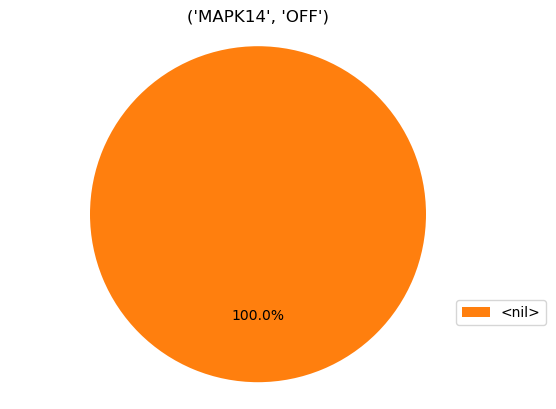

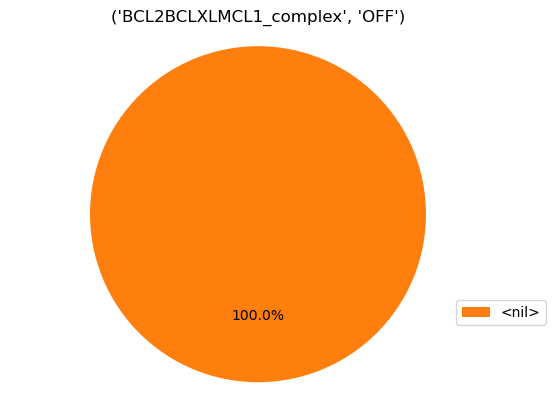

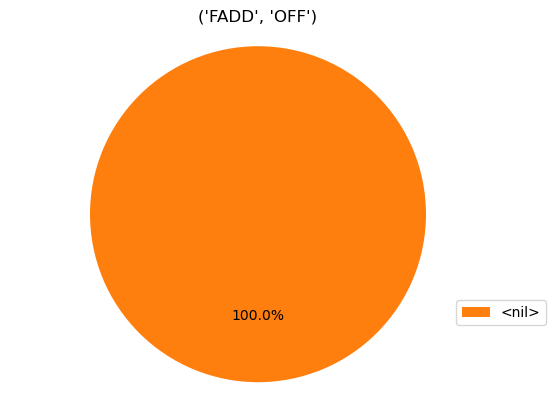

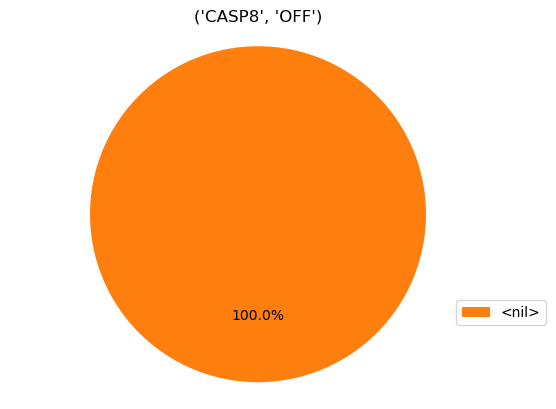

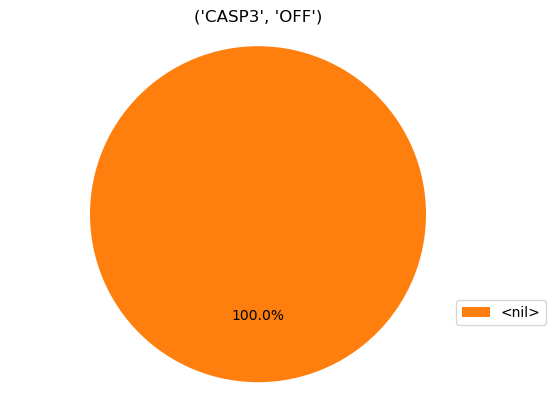

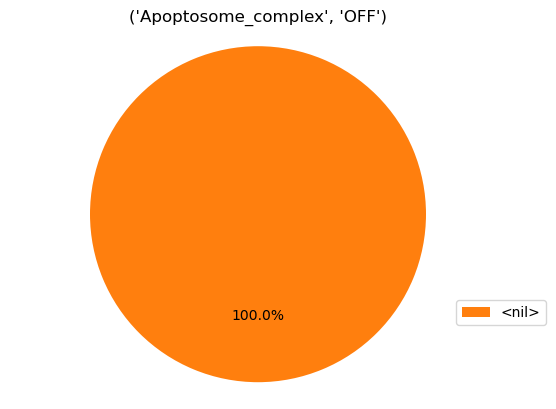

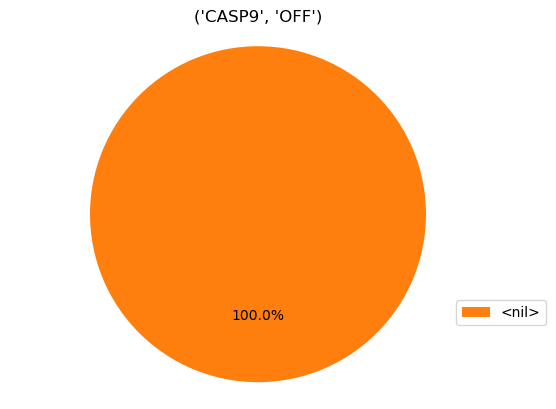

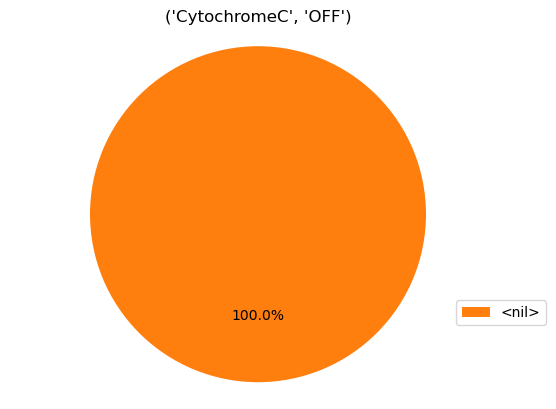

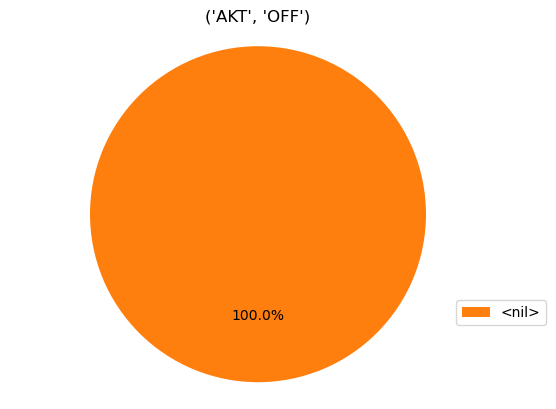

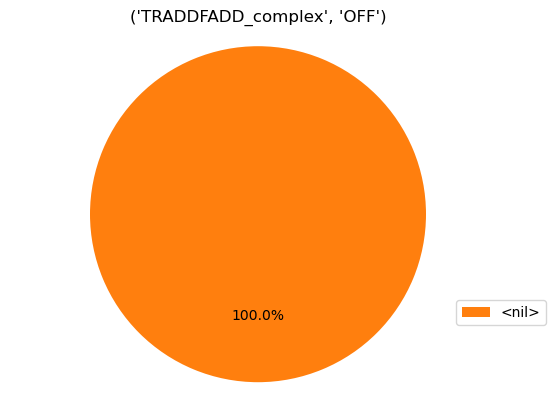

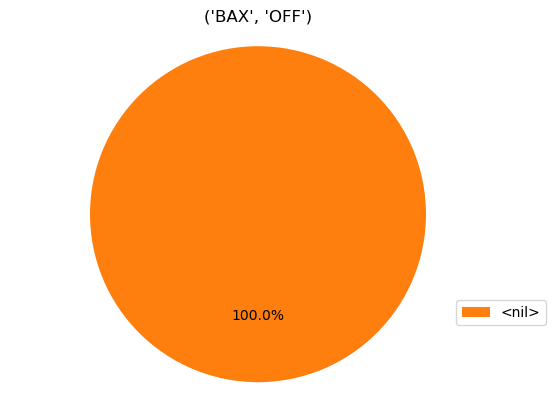

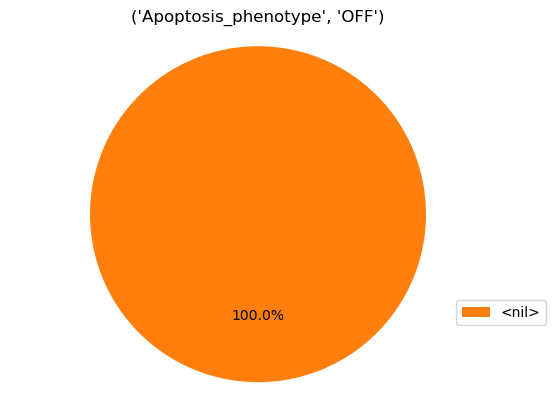

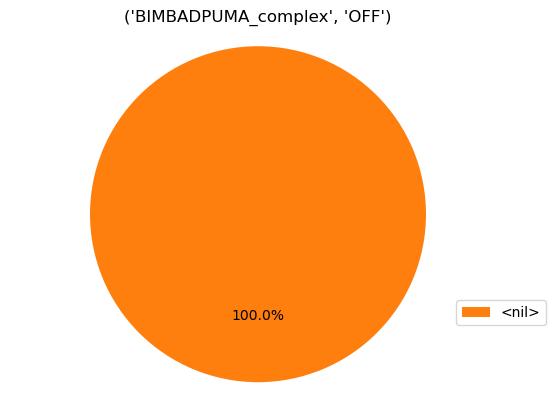

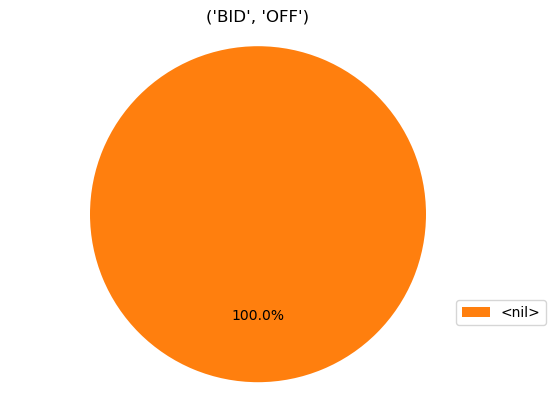

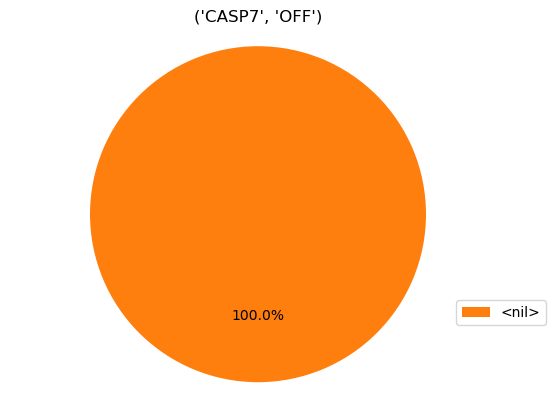

In [155]:
# Simulate through each INTERNAL node one at a time (ON)
single_internal_mutants_model = model.copy()
simulate_single_internal_mutants = simulate_single_mutants(single_internal_mutants_model, internal_nodes, 'OFF')
for simulate_single_internal_mutants, result in simulate_single_internal_mutants.items():
    result.plot_piechart()
    plt.title(simulate_single_internal_mutants)